# **確率ロボティクス2020課題　強化学習による行動決定**


### 16C1070 清水慧悟

### 課題内容
適当なタイルワールドを作って、そのなかでのエージェントの動きを強化学習のアルゴリズムを使って生成する．

### 実装方法
https://github.com/ryuichiueda/probrobo2017/blob/master/09.ipynb　を参考に7×7のマップを作成．

Q学習によってマップ内に設置した進入禁止のエリアを回避してゴールに向かう動きを作成．

In [1]:
class Agent:
    def __init__(self):
        #self.actions = ["up","down","left","right" , "urslant", "ulslant" , "drslant" , "dlslant"]
        self.actions = ["up","down","left","right" ]
        self.pos = (0,0)
        
agent = Agent()

In [2]:
size = 6

class State:
    def __init__(self,actions):
        self.Q = {}
        for a in actions:
            self.Q[a] = 0.0
        self.best_action = "up"
        self.goal = False
        self.noentry = False
        
    def set_goal(self,actions):
        for a in actions:
            self.Q[a] =0.0
        self.goal = True
    
    def set_noentry(self,actions):
        for a in actions:
            self.Q[a] =10.0
        #self.best_action = "up"
        self.noentry = True
        
states = [[State(agent.actions) for i in range(size)] for j in range(size)]
states[5][5].set_goal(agent.actions)
states[2][2].set_noentry(agent.actions)
states[4][3].set_noentry(agent.actions)
states[2][5].set_noentry(agent.actions)
states[1][1].set_noentry(agent.actions)

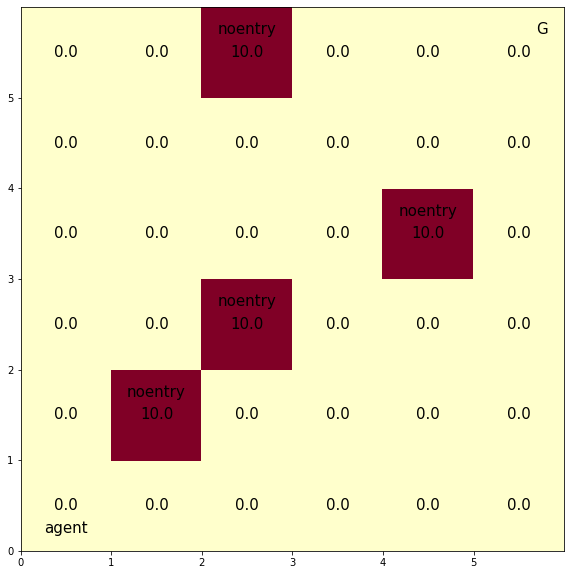

In [4]:

import matplotlib.pyplot as plt  
import matplotlib.patches as patches
import numpy as np

def draw(mark_pos):
    fig, ax = plt.subplots(figsize=(7,7))
    values = [[states[i][j].Q[states[i][j].best_action] for j in range(size)] for i in range(size)]
    mp = ax.pcolor(np.array(values).T, cmap=plt.cm.YlOrRd,vmin=0,vmax=8)
    ax.set_aspect(1)
    ax.set_xticks(range(size), minor=False)
    ax.set_yticks(range(size), minor=False)
 
    for x in range(len(values)):
        for y in range(len(values[0])):
            s = states[x][y]
            plt.text(x+0.5  ,y + 0.5 ,int(1000*s.Q[s.best_action])/1000,ha = 'center', va = 'center', size=15)
            if states[x][y].goal:
                plt.text(x+0.75 ,y+0.75 ,"G",ha = 'center', va = 'center', size=15)
            if states[x][y].noentry:
                plt.text(x+0.5 ,y+0.75 ,"noentry",ha = 'center', va = 'center', size=15)
                
    plt.text(agent.pos[0]+0.5  ,agent.pos[1] + 0.25 ,"agent",ha = 'center', va = 'center', size=15)

    if mark_pos == "all":   # 指定した位置にactionの文字列を書くという処理
        for x in range(size):
            for y in range(size):
                if states[x][y].goal: continue
                plt.text(x +0.5,y + 0.25,states[x][y].best_action,ha = 'center', va = 'center', size=15)
    elif mark_pos != None: 
        s = states[mark_pos[0]][mark_pos[1]]
        plt.text(mark_pos[0] + 0.5,mark_pos[1] + 0.5,s.best_action,ha = 'center', va = 'center', size=15)
        
    plt.show()
    fig.clear()
    
draw(None)

In [4]:
import random

def state_transition(s_pos,a):
    ###確率10%で元のまま ###
    if random.uniform(0,1) < 0.1:
        return s_pos
    
    x,y = s_pos
    if   a == "up": y += 1
    elif a == "down": y -= 1
    elif a == "right": x += 1
    elif a == "left": x -= 1
    elif a == "urslant": 
        x +=1
        y +=1   
    elif a == "ulslant": 
        x -=1
        y +=1  
    elif a == "drslant": 
        x +=1
        y -=1  
    elif a == "dlslant": 
        x -=1
        y -=1   
    if x < 0:       x = 0
    elif x >= size: x = size-1
    if y < 0:       y = 0
    elif y >= size: y = size-1 
    
    return (x,y)

In [5]:
def e_greedy(s):
    if random.uniform(0,1) < 0.1: #10%でランダムに
        return random.choice(agent.actions)
    else:
        best_a = None
        best_q = 1000000000
        for a in s.Q:
            if best_q > s.Q[a]:
                best_q = s.Q[a]
                best_a = a
        s.best_action = best_a
        return best_a

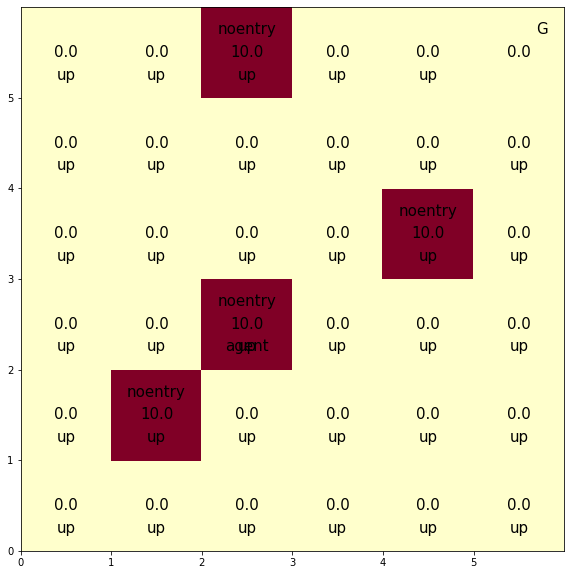

s:(0, 5)　a:up s':(0, 5) a':up
----
s:(0, 5)　a:up s':(0, 5) a':down
----
s:(0, 5)　a:down s':(0, 4) a':up
----
s:(0, 4)　a:up s':(0, 5) a':left
----
s:(0, 5)　a:left s':(0, 5) a':left
----
s:(0, 5)　a:left s':(0, 5) a':up
----
s:(0, 5)　a:up s':(0, 5) a':right
----
s:(0, 5)　a:right s':(1, 5) a':up
----
s:(1, 5)　a:up s':(1, 5) a':up
----
s:(1, 5)　a:up s':(1, 5) a':down
----
s:(1, 5)　a:down s':(1, 4) a':up
----
s:(1, 4)　a:up s':(1, 5) a':left
----
s:(1, 5)　a:left s':(0, 5) a':down
----
s:(0, 5)　a:down s':(0, 4) a':right
----
s:(0, 4)　a:right s':(1, 4) a':down
----
s:(1, 4)　a:down s':(1, 4) a':left
----
s:(1, 4)　a:left s':(0, 4) a':down
----
s:(0, 4)　a:down s':(0, 3) a':up
----
s:(0, 3)　a:up s':(0, 4) a':left
----
s:(0, 4)　a:left s':(0, 4) a':left
----
s:(0, 4)　a:left s':(0, 4) a':up
----
s:(0, 4)　a:up s':(0, 5) a':right
----
s:(0, 5)　a:right s':(1, 5) a':right
----
s:(1, 5)　a:right s':(2, 5) a':up
----


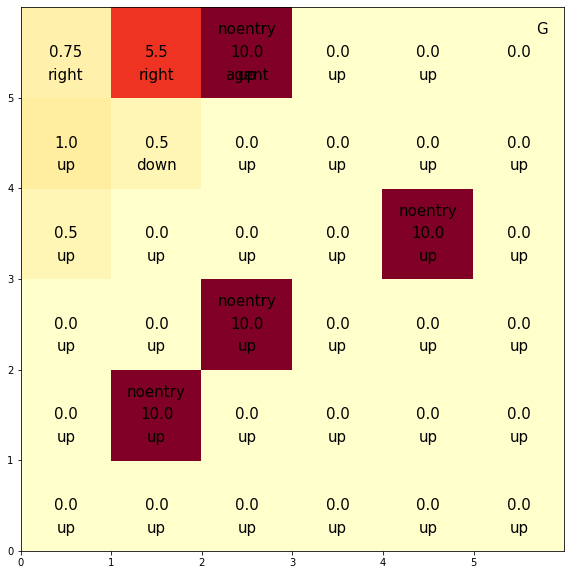

s:(0, 5)　a:down s':(0, 4) a':down
----
s:(0, 4)　a:down s':(0, 4) a':down
----
s:(0, 4)　a:down s':(0, 3) a':down
----
s:(0, 3)　a:down s':(0, 2) a':up
----
s:(0, 2)　a:up s':(0, 3) a':left
----
s:(0, 3)　a:left s':(0, 3) a':left
----
s:(0, 3)　a:left s':(0, 3) a':right
----
s:(0, 3)　a:right s':(1, 3) a':up
----
s:(1, 3)　a:up s':(1, 4) a':right
----
s:(1, 4)　a:right s':(2, 4) a':up
----
s:(2, 4)　a:up s':(2, 5) a':up
----


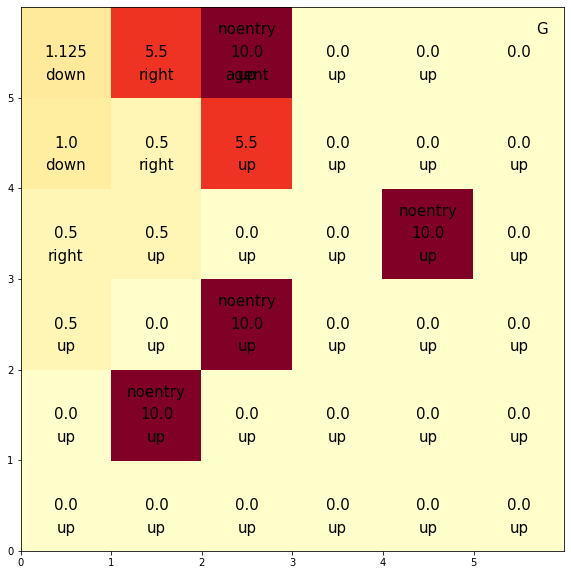

s:(3, 5)　a:up s':(3, 5) a':up
----
s:(3, 5)　a:up s':(3, 5) a':down
----
s:(3, 5)　a:down s':(3, 4) a':up
----
s:(3, 4)　a:up s':(3, 5) a':left
----
s:(3, 5)　a:left s':(2, 5) a':up
----


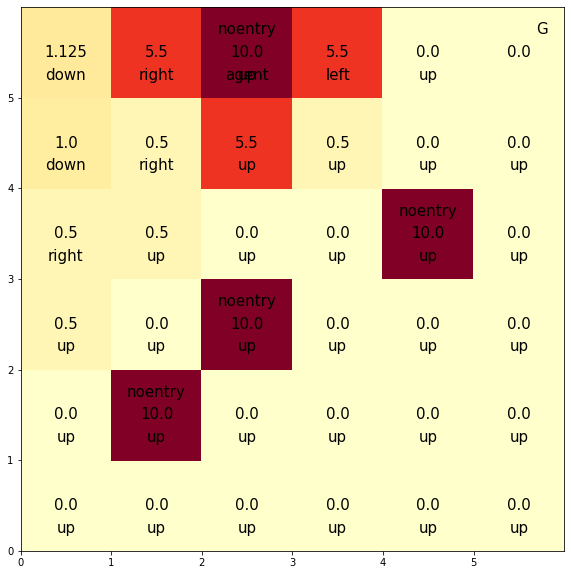

s:(2, 3)　a:right s':(3, 3) a':up
----
s:(3, 3)　a:up s':(3, 4) a':down
----
s:(3, 4)　a:down s':(3, 4) a':down
----
s:(3, 4)　a:down s':(3, 3) a':down
----
s:(3, 3)　a:down s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 3) a':left
----
s:(3, 3)　a:left s':(2, 3) a':up
----
s:(2, 3)　a:up s':(2, 4) a':down
----
s:(2, 4)　a:down s':(2, 3) a':down
----
s:(2, 3)　a:down s':(2, 2) a':up
----


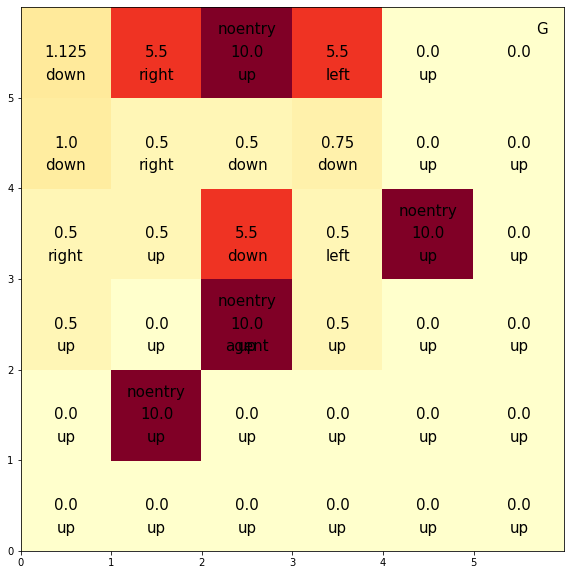

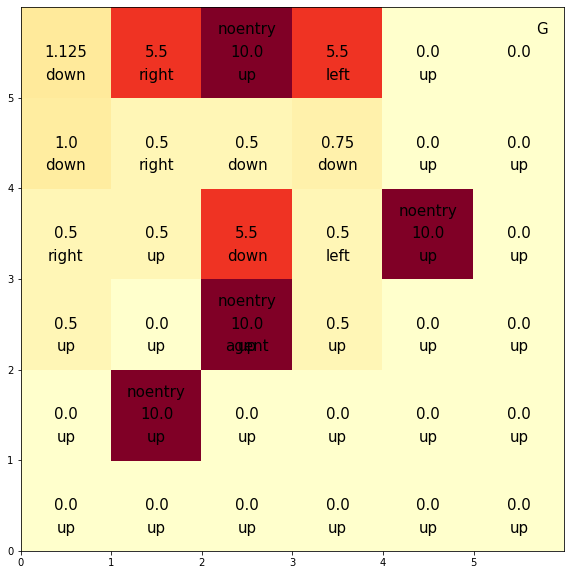

s:(0, 4)　a:right s':(1, 4) a':up
----
s:(1, 4)　a:up s':(1, 4) a':up
----
s:(1, 4)　a:up s':(1, 5) a':down
----
s:(1, 5)　a:down s':(1, 4) a':down
----
s:(1, 4)　a:down s':(1, 3) a':down
----
s:(1, 3)　a:down s':(1, 2) a':up
----
s:(1, 2)　a:up s':(1, 3) a':left
----
s:(1, 3)　a:left s':(0, 3) a':down
----
s:(0, 3)　a:down s':(0, 2) a':left
----
s:(0, 2)　a:left s':(0, 2) a':down
----
s:(0, 2)　a:down s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':down
----
s:(1, 2)　a:down s':(1, 2) a':down
----
s:(1, 2)　a:down s':(1, 1) a':up
----


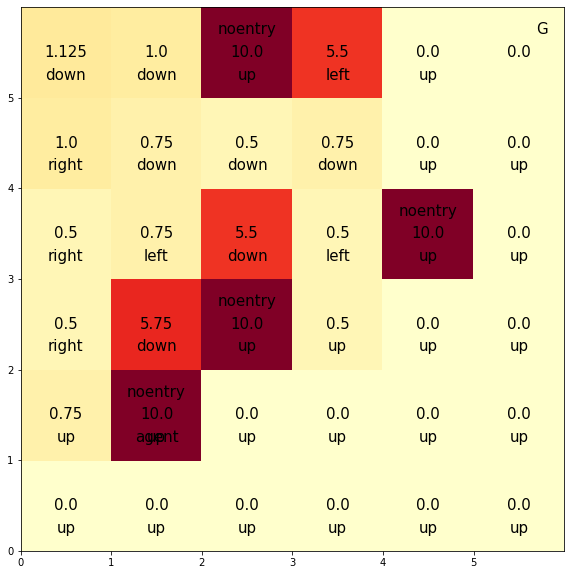

s:(5, 4)　a:up s':(5, 5) a':up
----


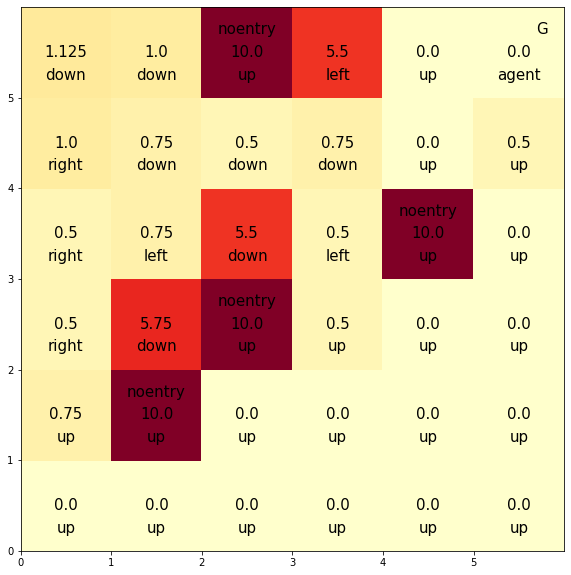

s:(1, 4)　a:up s':(1, 5) a':up
----
s:(1, 5)　a:up s':(1, 5) a':up
----
s:(1, 5)　a:up s':(1, 5) a':left
----
s:(1, 5)　a:left s':(0, 5) a':right
----
s:(0, 5)　a:right s':(1, 5) a':down
----
s:(1, 5)　a:down s':(1, 4) a':left
----
s:(1, 4)　a:left s':(1, 4) a':left
----
s:(1, 4)　a:left s':(0, 4) a':up
----
s:(0, 4)　a:up s':(0, 5) a':up
----
s:(0, 5)　a:up s':(0, 5) a':down
----
s:(0, 5)　a:down s':(0, 4) a':down
----
s:(0, 4)　a:down s':(0, 3) a':up
----
s:(0, 3)　a:up s':(0, 4) a':left
----
s:(0, 4)　a:left s':(0, 4) a':left
----
s:(0, 4)　a:left s':(0, 4) a':right
----
s:(0, 4)　a:right s':(1, 4) a':up
----
s:(1, 4)　a:up s':(1, 5) a':down
----
s:(1, 5)　a:down s':(1, 4) a':right
----
s:(1, 4)　a:right s':(2, 4) a':left
----
s:(2, 4)　a:left s':(1, 4) a':down
----
s:(1, 4)　a:down s':(1, 4) a':down
----
s:(1, 4)　a:down s':(1, 3) a':right
----
s:(1, 3)　a:right s':(2, 3) a':left
----
s:(2, 3)　a:left s':(1, 3) a':up
----
s:(1, 3)　a:up s':(1, 4) a':right
----
s:(1, 4)　a:right s':(2, 4) a':right
----
s:(2,

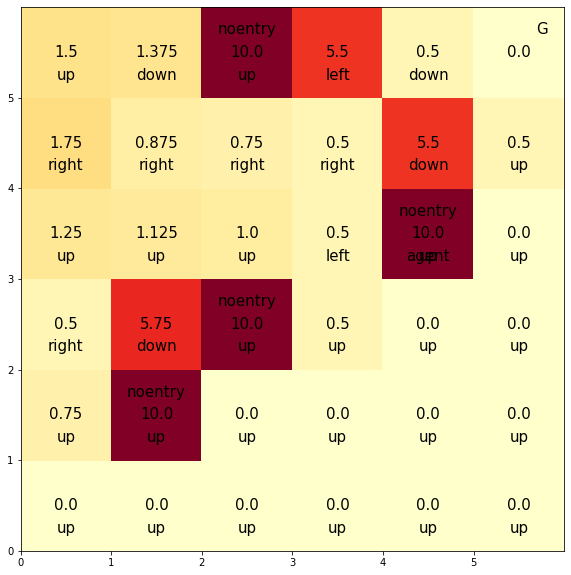

s:(3, 2)　a:down s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':left
----
s:(3, 2)　a:left s':(3, 2) a':left
----
s:(3, 2)　a:left s':(2, 2) a':down
----


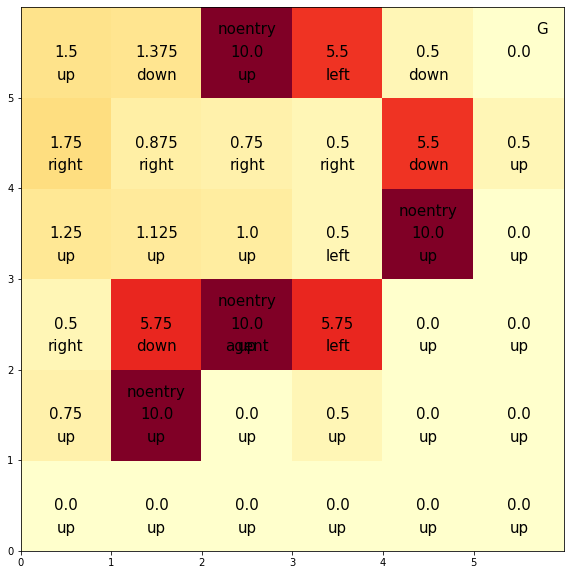

s:(3, 5)　a:right s':(4, 5) a':left
----
s:(4, 5)　a:left s':(3, 5) a':down
----
s:(3, 5)　a:down s':(3, 5) a':down
----
s:(3, 5)　a:down s':(3, 4) a':up
----
s:(3, 4)　a:up s':(3, 5) a':right
----
s:(3, 5)　a:right s':(3, 5) a':right
----
s:(3, 5)　a:right s':(4, 5) a':up
----
s:(4, 5)　a:up s':(4, 5) a':right
----
s:(4, 5)　a:right s':(5, 5) a':up
----


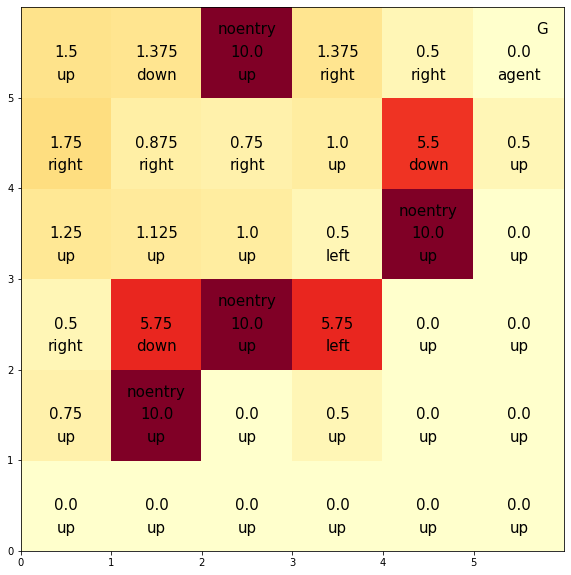

s:(3, 4)　a:right s':(4, 4) a':left
----
s:(4, 4)　a:left s':(3, 4) a':down
----
s:(3, 4)　a:down s':(3, 3) a':right
----
s:(3, 3)　a:right s':(4, 3) a':up
----


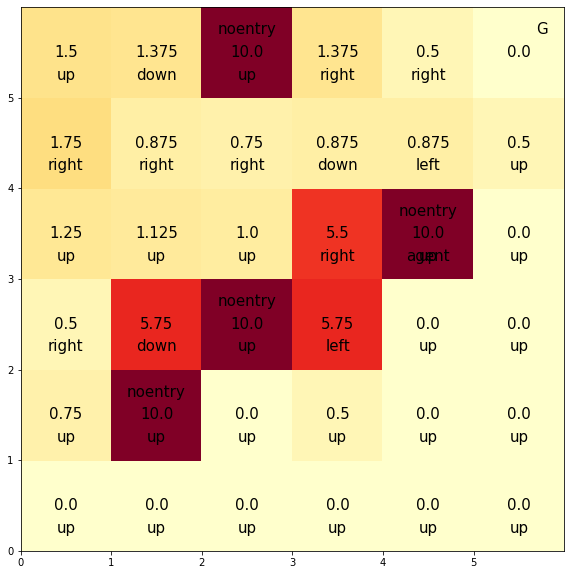

s:(1, 2)　a:down s':(1, 1) a':up
----


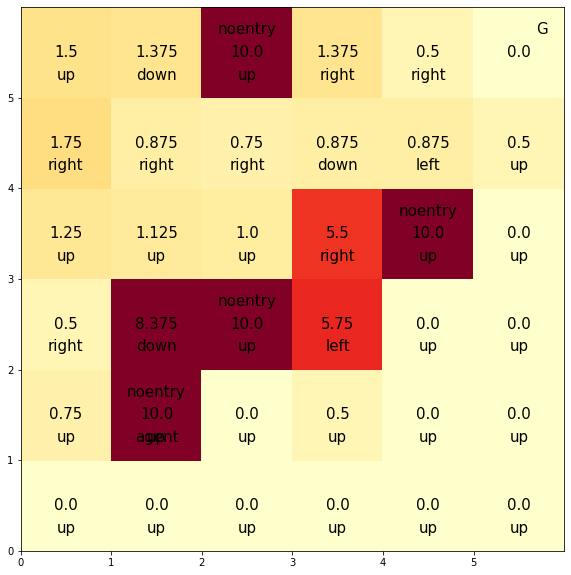

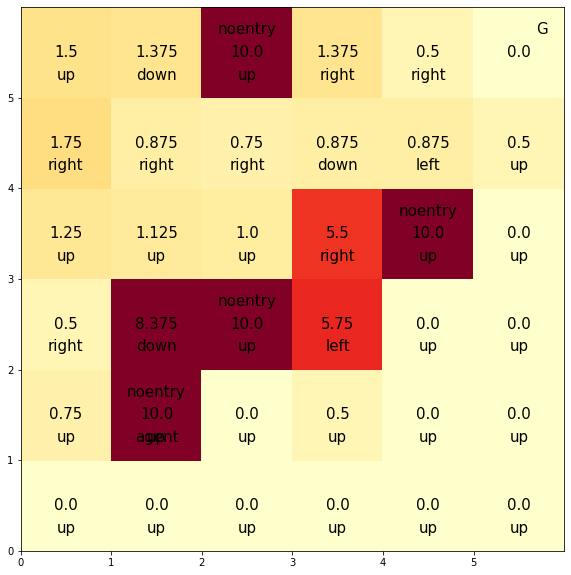

s:(5, 0)　a:up s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':down
----
s:(5, 2)　a:down s':(5, 1) a':down
----
s:(5, 1)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':left
----
s:(5, 0)　a:left s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':up
----
s:(4, 1)　a:up s':(4, 2) a':up
----
s:(4, 2)　a:up s':(4, 3) a':up
----


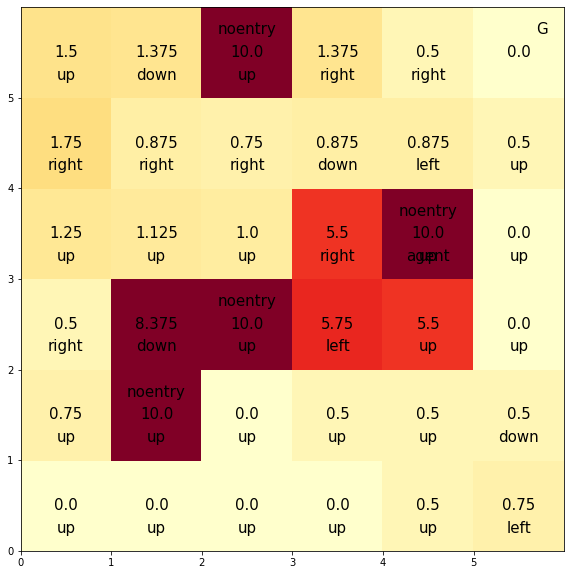

s:(0, 5)　a:left s':(0, 5) a':left
----
s:(0, 5)　a:left s':(0, 5) a':right
----
s:(0, 5)　a:right s':(1, 5) a':left
----
s:(1, 5)　a:left s':(0, 5) a':up
----
s:(0, 5)　a:up s':(0, 5) a':up
----
s:(0, 5)　a:up s':(0, 5) a':down
----
s:(0, 5)　a:down s':(0, 4) a':down
----
s:(0, 4)　a:down s':(0, 4) a':down
----
s:(0, 4)　a:down s':(0, 3) a':right
----
s:(0, 3)　a:right s':(1, 3) a':down
----
s:(1, 3)　a:down s':(1, 2) a':left
----
s:(1, 2)　a:left s':(0, 2) a':up
----
s:(0, 2)　a:up s':(0, 3) a':down
----
s:(0, 3)　a:down s':(0, 2) a':down
----
s:(0, 2)　a:down s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':left
----
s:(0, 2)　a:left s':(0, 2) a':left
----
s:(0, 2)　a:left s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':right
----
s:(1, 2)　a:right s':(2, 2) a':up
----


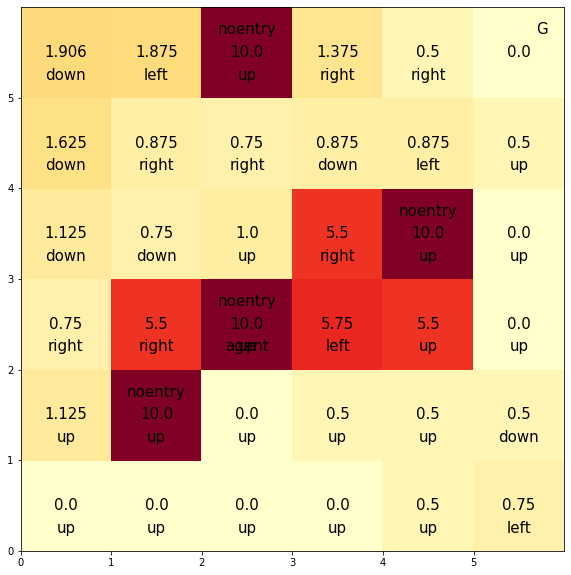

s:(0, 0)　a:up s':(0, 1) a':down
----
s:(0, 1)　a:down s':(0, 0) a':down
----
s:(0, 0)　a:down s':(0, 0) a':down
----
s:(0, 0)　a:down s':(0, 0) a':left
----
s:(0, 0)　a:left s':(0, 0) a':left
----
s:(0, 0)　a:left s':(0, 0) a':right
----
s:(0, 0)　a:right s':(0, 0) a':right
----
s:(0, 0)　a:right s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':up
----


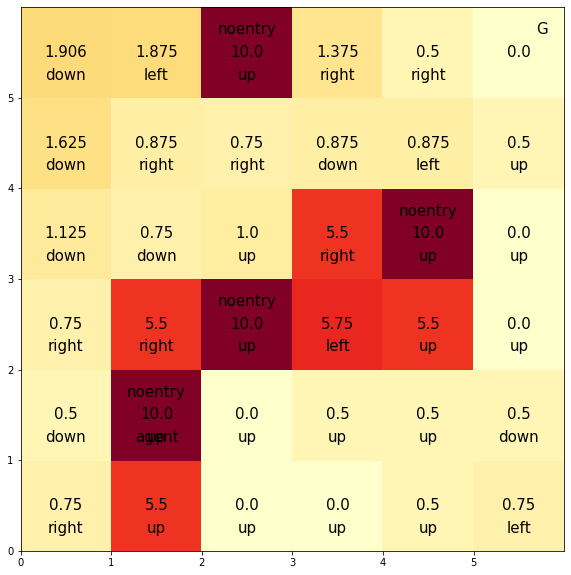

s:(3, 1)　a:down s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':left
----
s:(3, 1)　a:left s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':up
----
s:(2, 1)　a:up s':(2, 2) a':up
----


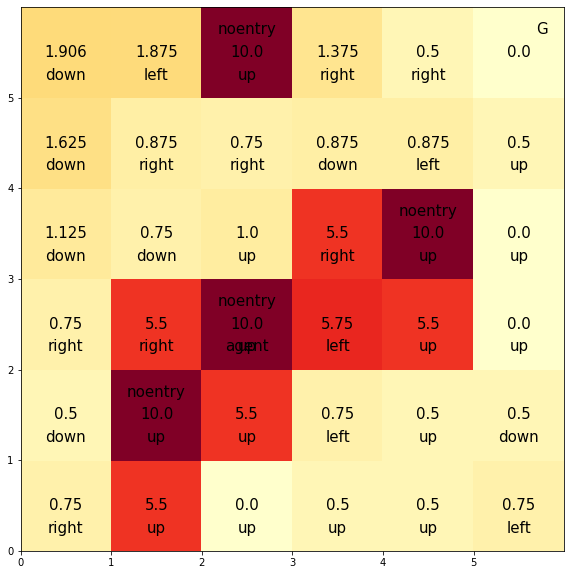

s:(3, 1)　a:right s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':left
----
s:(1, 0)　a:left s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':right
----
s:(0, 1)　a:right s':(1, 1) a':up
----


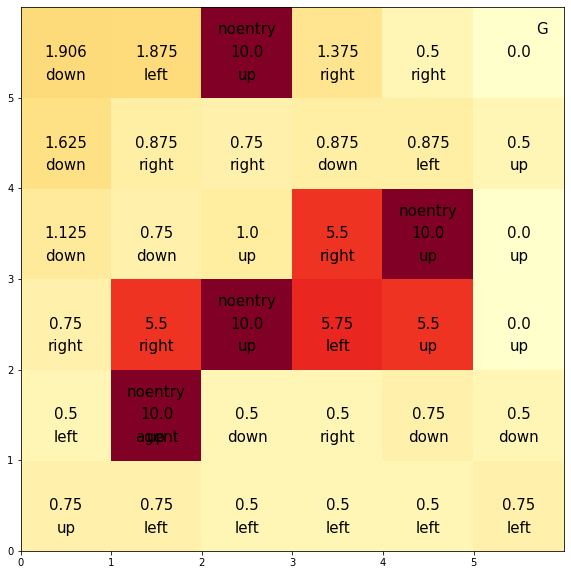

s:(0, 1)　a:down s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':up
----
s:(1, 2)　a:up s':(1, 3) a':right
----
s:(1, 3)　a:right s':(2, 3) a':right
----
s:(2, 3)　a:right s':(3, 3) a':up
----
s:(3, 3)　a:up s':(3, 3) a':up
----
s:(3, 3)　a:up s':(3, 4) a':left
----
s:(3, 4)　a:left s':(2, 4) a':right
----
s:(2, 4)　a:right s':(3, 4) a':right
----
s:(3, 4)　a:right s':(4, 4) a':right
----
s:(4, 4)　a:right s':(5, 4) a':down
----
s:(5, 4)　a:down s':(5, 3) a':up
----
s:(5, 3)　a:up s':(5, 4) a':up
----
s:(5, 4)　a:up s':(5, 5) a':up
----


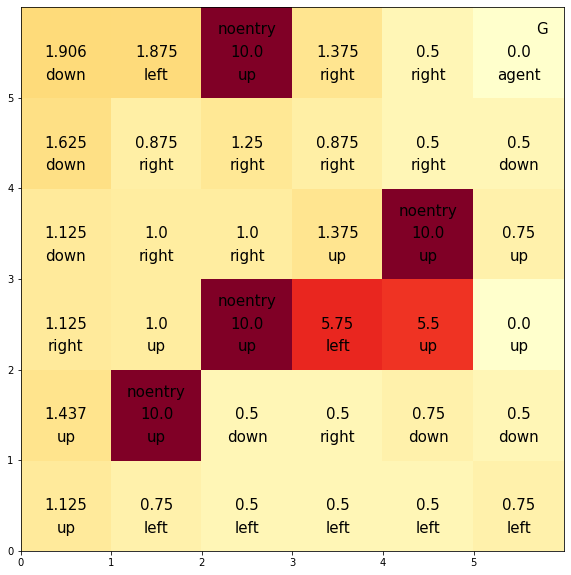

s:(4, 4)　a:up s':(4, 5) a':down
----
s:(4, 5)　a:down s':(4, 4) a':right
----
s:(4, 4)　a:right s':(4, 4) a':right
----
s:(4, 4)　a:right s':(4, 4) a':left
----
s:(4, 4)　a:left s':(3, 4) a':down
----
s:(3, 4)　a:down s':(3, 3) a':down
----
s:(3, 3)　a:down s':(3, 3) a':down
----
s:(3, 3)　a:down s':(3, 2) a':right
----
s:(3, 2)　a:right s':(4, 2) a':down
----
s:(4, 2)　a:down s':(4, 2) a':down
----
s:(4, 2)　a:down s':(4, 1) a':left
----
s:(4, 1)　a:left s':(4, 1) a':up
----
s:(4, 1)　a:up s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 3) a':left
----
s:(3, 3)　a:left s':(2, 3) a':left
----
s:(2, 3)　a:left s':(1, 3) a':down
----
s:(1, 3)　a:down s':(1, 3) a':down
----
s:(1, 3)　a:down s':(1, 2) a':left
----
s:(1, 2)　a:left s':(0, 2) a':up
----
s:(0, 2)　a:up s':(0, 3) a':left
----
s:(0, 3)　a:left s':(0, 3) a':left
----
s:(0, 3)　a:left s':(0, 3) a':right
----
s:(0, 3)　a:right s':(1, 3) a':left
----
s:(1, 3)　a:left s':(0, 3) a':down
----
s:(0, 3)　a:down s':(0, 2) a':do

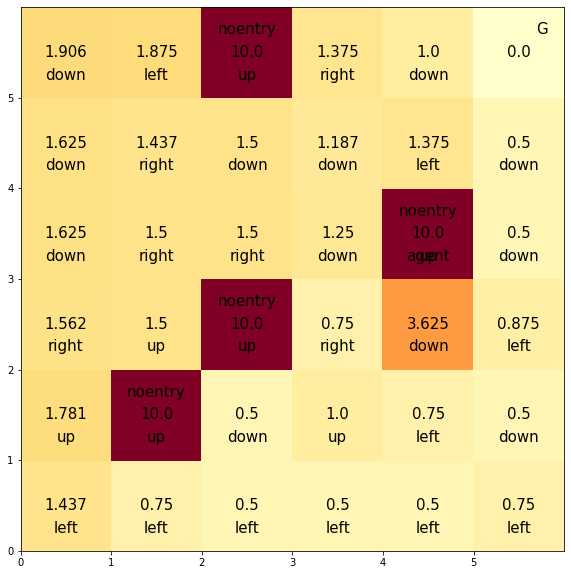

s:(0, 3)　a:up s':(0, 4) a':up
----
s:(0, 4)　a:up s':(0, 5) a':right
----
s:(0, 5)　a:right s':(1, 5) a':down
----
s:(1, 5)　a:down s':(1, 4) a':down
----
s:(1, 4)　a:down s':(1, 3) a':up
----
s:(1, 3)　a:up s':(1, 4) a':right
----
s:(1, 4)　a:right s':(2, 4) a':right
----
s:(2, 4)　a:right s':(3, 4) a':right
----
s:(3, 4)　a:right s':(4, 4) a':up
----
s:(4, 4)　a:up s':(4, 5) a':right
----
s:(4, 5)　a:right s':(5, 5) a':up
----


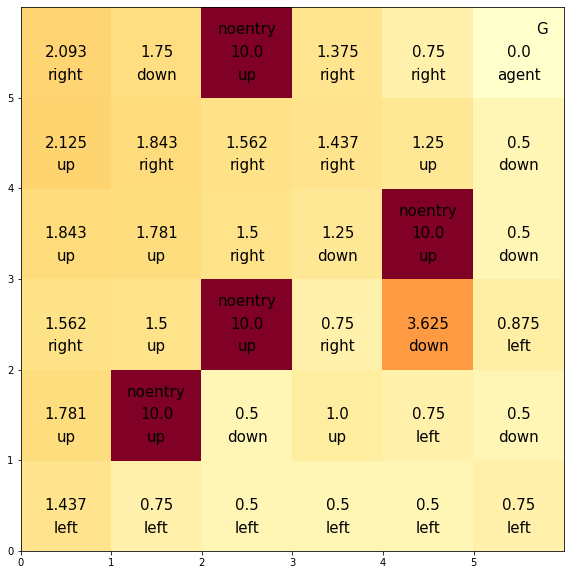

s:(0, 3)　a:right s':(1, 3) a':down
----
s:(1, 3)　a:down s':(1, 2) a':left
----
s:(1, 2)　a:left s':(0, 2) a':down
----
s:(0, 2)　a:down s':(0, 1) a':down
----
s:(0, 1)　a:down s':(0, 0) a':right
----
s:(0, 0)　a:right s':(0, 0) a':right
----
s:(0, 0)　a:right s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':right
----
s:(2, 0)　a:right s':(3, 0) a':right
----
s:(3, 0)　a:right s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':right
----
s:(5, 0)　a:right s':(5, 0) a':right
----
s:(5, 0)　a:right s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':right
----
s:(4, 1)　a:right s':(5, 1) a':right
----
s:(5, 1)　a:right s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':right
----
s:(5, 2)　a:right s':(5, 2) a':right
----
s:(5, 2)　a:right s':(5, 2) a':down
----
s:(5, 2)　a:down s':(5, 1) a':down
----
s:(5, 1)　a:down s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':right
----
s:(4, 1)　a:right s':(5, 1) a':up
----
s:(5, 1)　a:u

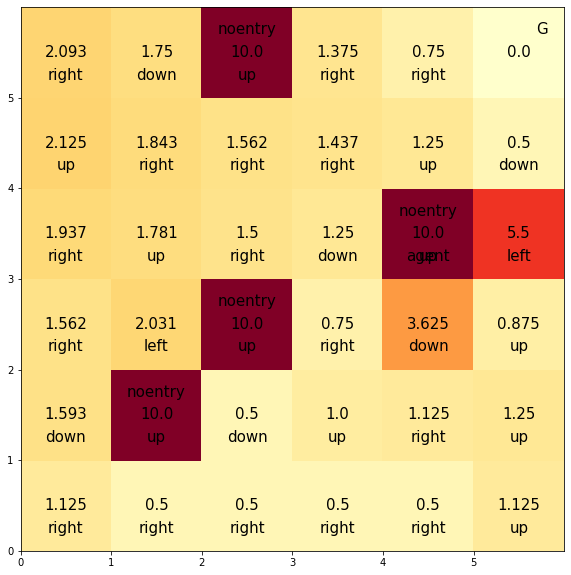

s:(0, 4)　a:down s':(0, 3) a':down
----
s:(0, 3)　a:down s':(0, 2) a':up
----
s:(0, 2)　a:up s':(0, 3) a':left
----
s:(0, 3)　a:left s':(0, 3) a':left
----
s:(0, 3)　a:left s':(0, 3) a':up
----
s:(0, 3)　a:up s':(0, 4) a':left
----
s:(0, 4)　a:left s':(0, 4) a':left
----
s:(0, 4)　a:left s':(0, 4) a':right
----
s:(0, 4)　a:right s':(1, 4) a':left
----
s:(1, 4)　a:left s':(0, 4) a':left
----
s:(0, 4)　a:left s':(0, 4) a':up
----
s:(0, 4)　a:up s':(0, 5) a':down
----
s:(0, 5)　a:down s':(0, 4) a':down
----
s:(0, 4)　a:down s':(0, 3) a':right
----
s:(0, 3)　a:right s':(1, 3) a':up
----
s:(1, 3)　a:up s':(1, 4) a':down
----
s:(1, 4)　a:down s':(1, 3) a':left
----
s:(1, 3)　a:left s':(0, 3) a':down
----
s:(0, 3)　a:down s':(0, 2) a':left
----
s:(0, 2)　a:left s':(0, 2) a':left
----
s:(0, 2)　a:left s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':up
----
s:(1, 2)　a:up s':(1, 3) a':right
----
s:(1, 3)　a:right s':(2, 3) a':right
----
s:(2, 3)　a:right s':(3, 3) a':left
----
s:(3, 3)　a:left s':(2, 3) a':left
-

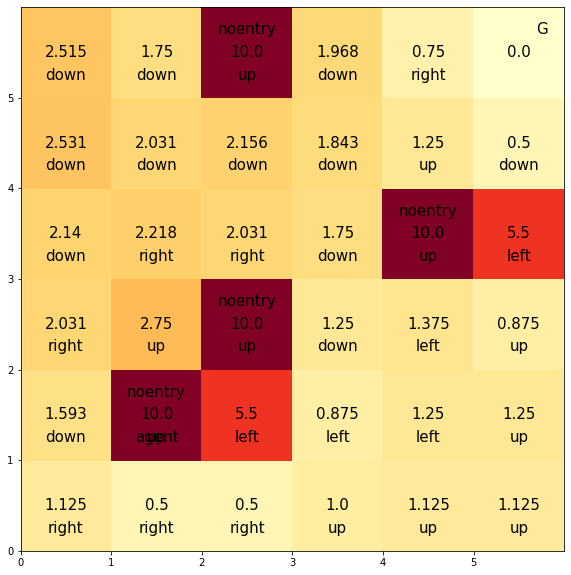

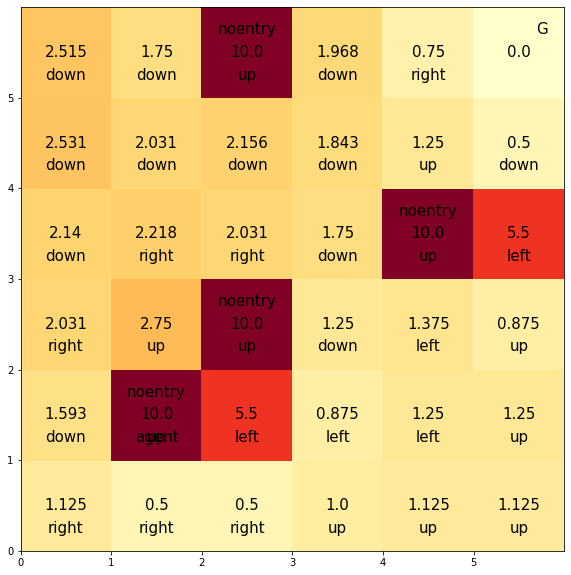

s:(3, 5)　a:right s':(4, 5) a':left
----
s:(4, 5)　a:left s':(3, 5) a':right
----
s:(3, 5)　a:right s':(4, 5) a':right
----
s:(4, 5)　a:right s':(5, 5) a':up
----


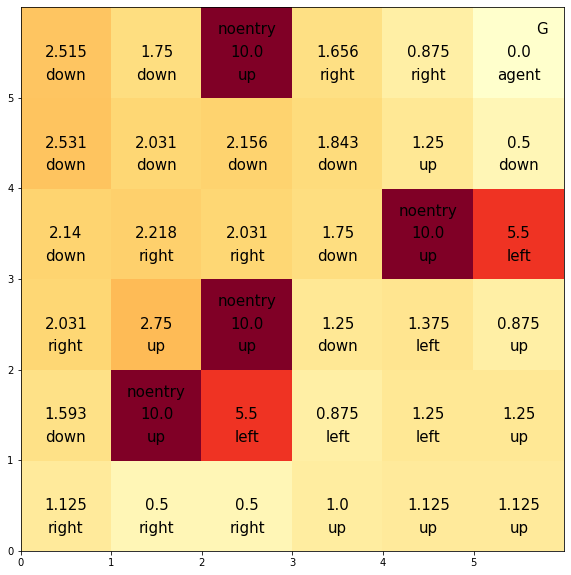

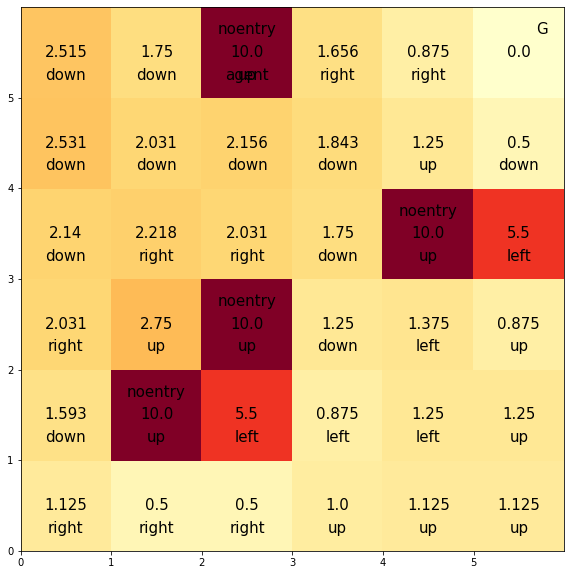

s:(3, 1)　a:left s':(2, 1) a':right
----
s:(2, 1)　a:right s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':right
----
s:(2, 1)　a:right s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':down
----
s:(3, 2)　a:down s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 0) a':right
----
s:(2, 0)　a:right s':(3, 0) a':right
----
s:(3, 0)　a:right s':(3, 0) a':right
----
s:(3, 0)　a:right s':(4, 0) a':left
----
s:(4, 0)　a:left s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':right
----
s:(3, 1)　a:right s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':ri

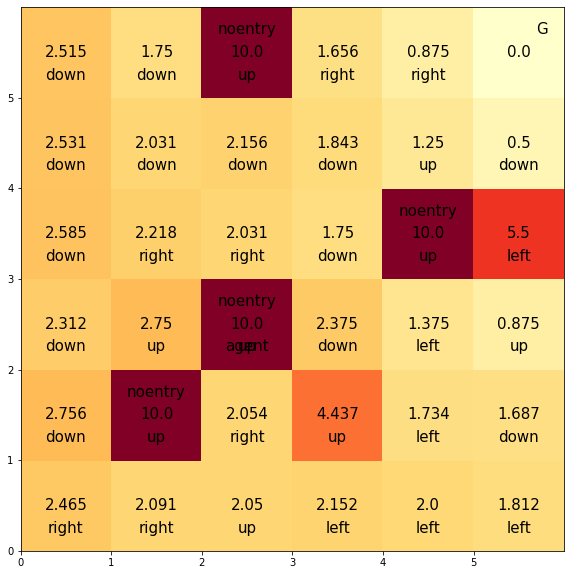

s:(3, 5)　a:right s':(3, 5) a':right
----
s:(3, 5)　a:right s':(4, 5) a':up
----
s:(4, 5)　a:up s':(4, 5) a':left
----
s:(4, 5)　a:left s':(3, 5) a':down
----
s:(3, 5)　a:down s':(3, 4) a':left
----
s:(3, 4)　a:left s':(2, 4) a':left
----
s:(2, 4)　a:left s':(1, 4) a':right
----
s:(1, 4)　a:right s':(2, 4) a':right
----
s:(2, 4)　a:right s':(3, 4) a':up
----
s:(3, 4)　a:up s':(3, 5) a':up
----
s:(3, 5)　a:up s':(3, 5) a':down
----
s:(3, 5)　a:down s':(3, 4) a':right
----
s:(3, 4)　a:right s':(4, 4) a':up
----
s:(4, 4)　a:up s':(4, 4) a':up
----
s:(4, 4)　a:up s':(4, 5) a':right
----
s:(4, 5)　a:right s':(5, 5) a':up
----


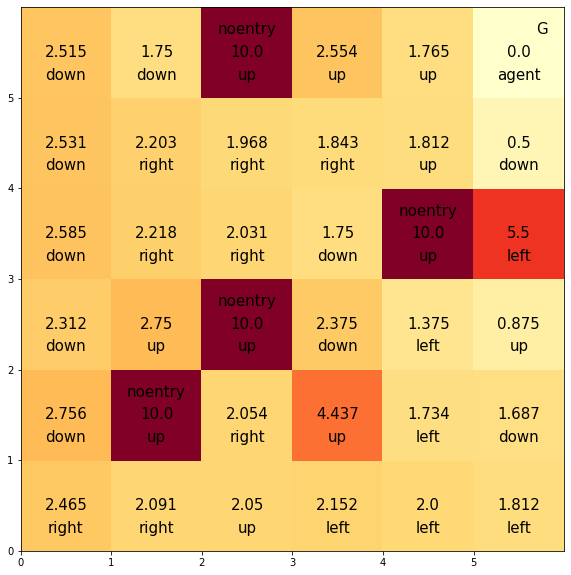

s:(1, 5)　a:up s':(1, 5) a':left
----
s:(1, 5)　a:left s':(0, 5) a':left
----
s:(0, 5)　a:left s':(0, 5) a':left
----
s:(0, 5)　a:left s':(0, 5) a':right
----
s:(0, 5)　a:right s':(0, 5) a':right
----
s:(0, 5)　a:right s':(1, 5) a':down
----
s:(1, 5)　a:down s':(1, 4) a':up
----
s:(1, 4)　a:up s':(1, 5) a':up
----
s:(1, 5)　a:up s':(1, 5) a':up
----
s:(1, 5)　a:up s':(1, 5) a':down
----
s:(1, 5)　a:down s':(1, 5) a':down
----
s:(1, 5)　a:down s':(1, 4) a':up
----
s:(1, 4)　a:up s':(1, 5) a':left
----
s:(1, 5)　a:left s':(0, 5) a':right
----
s:(0, 5)　a:right s':(1, 5) a':left
----
s:(1, 5)　a:left s':(0, 5) a':right
----
s:(0, 5)　a:right s':(1, 5) a':up
----
s:(1, 5)　a:up s':(1, 5) a':up
----
s:(1, 5)　a:up s':(1, 5) a':down
----
s:(1, 5)　a:down s':(1, 4) a':down
----
s:(1, 4)　a:down s':(1, 3) a':up
----
s:(1, 3)　a:up s':(1, 4) a':right
----
s:(1, 4)　a:right s':(2, 4) a':right
----
s:(2, 4)　a:right s':(3, 4) a':down
----
s:(3, 4)　a:down s':(3, 3) a':up
----
s:(3, 3)　a:up s':(3, 4) a':right
----
s:(3, 4

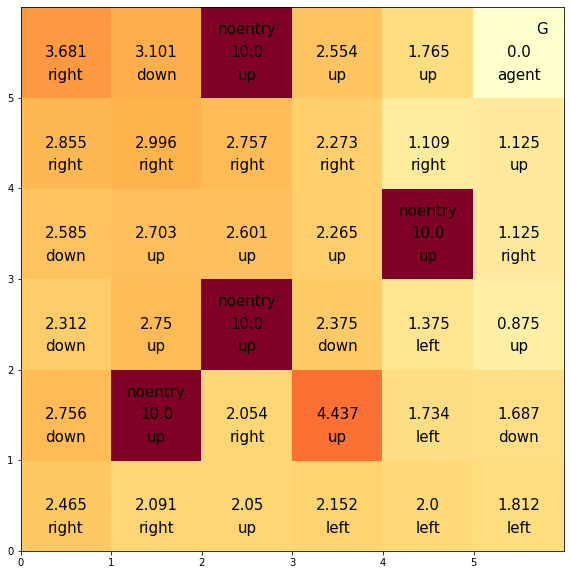

s:(1, 4)　a:up s':(1, 5) a':down
----
s:(1, 5)　a:down s':(1, 5) a':down
----
s:(1, 5)　a:down s':(1, 4) a':down
----
s:(1, 4)　a:down s':(1, 3) a':down
----
s:(1, 3)　a:down s':(1, 2) a':down
----
s:(1, 2)　a:down s':(1, 1) a':up
----


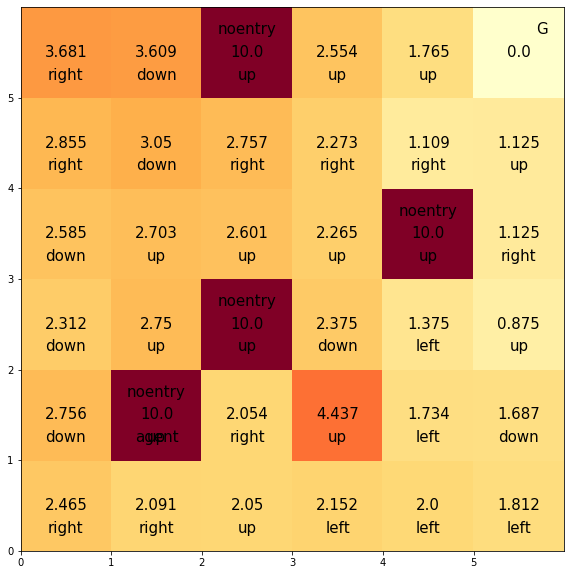

s:(3, 5)　a:down s':(3, 4) a':left
----
s:(3, 4)　a:left s':(3, 4) a':up
----
s:(3, 4)　a:up s':(3, 5) a':up
----
s:(3, 5)　a:up s':(3, 5) a':right
----
s:(3, 5)　a:right s':(4, 5) a':right
----
s:(4, 5)　a:right s':(5, 5) a':up
----


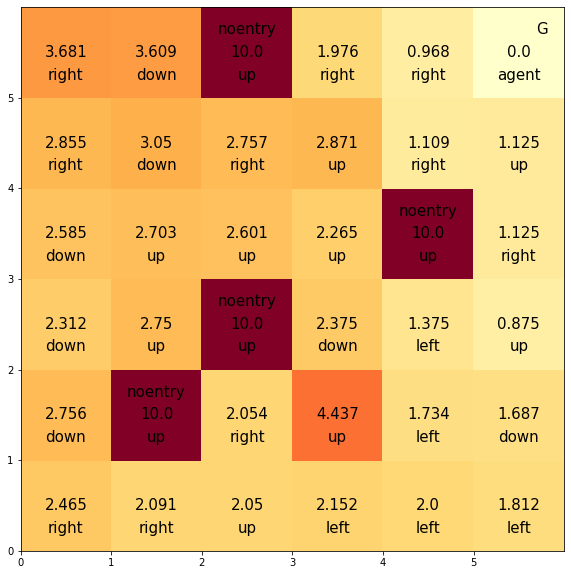

s:(3, 0)　a:right s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':right
----
s:(3, 1)　a:right s':(3, 1) a':right
----
s:(3, 1)　a:right s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 3) a':down
----
s:(5, 3)　a:down s':(5, 2) a':left
----
s:(5, 2)　a:left s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':right
----
s:(4, 2)　a:right s':(5, 2) a':down
----
s:(5, 2)　a:down s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':right
----
s:(5, 2)　a:right s':(5, 2) a':down
----
s:(5, 2)　a:down s':(5, 1) a':right
----
s:(5, 1)　a:right s':(5, 1) a':right
----
s:(5, 1)　a:right s':(5, 1) a':down
----
s:(5, 1)　a:down s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':l

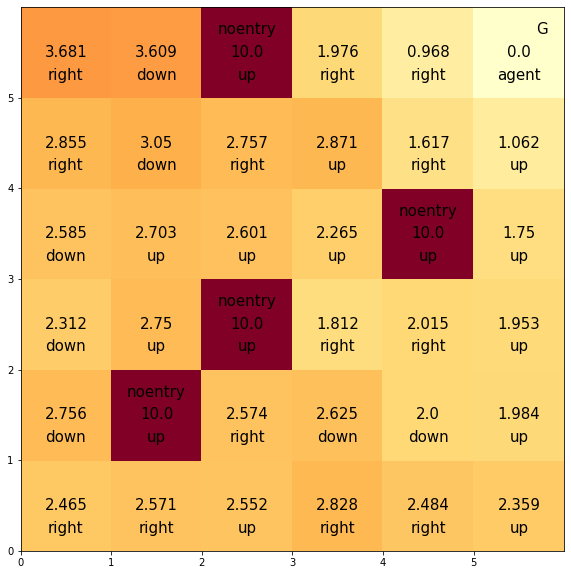

s:(2, 3)　a:right s':(3, 3) a':left
----
s:(3, 3)　a:left s':(2, 3) a':left
----
s:(2, 3)　a:left s':(1, 3) a':right
----
s:(1, 3)　a:right s':(2, 3) a':right
----
s:(2, 3)　a:right s':(3, 3) a':down
----
s:(3, 3)　a:down s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 3) a':down
----
s:(3, 3)　a:down s':(3, 2) a':right
----
s:(3, 2)　a:right s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':right
----
s:(3, 2)　a:right s':(4, 2) a':right
----
s:(4, 2)　a:right s':(5, 2) a':right
----
s:(5, 2)　a:right s':(5, 2) a':right
----
s:(5, 2)　a:right s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 3) a':up
----
s:(5, 3)　a:up s':(5, 4) a':up
----
s:(5, 4)　a:up s':(5, 5) a':up
----


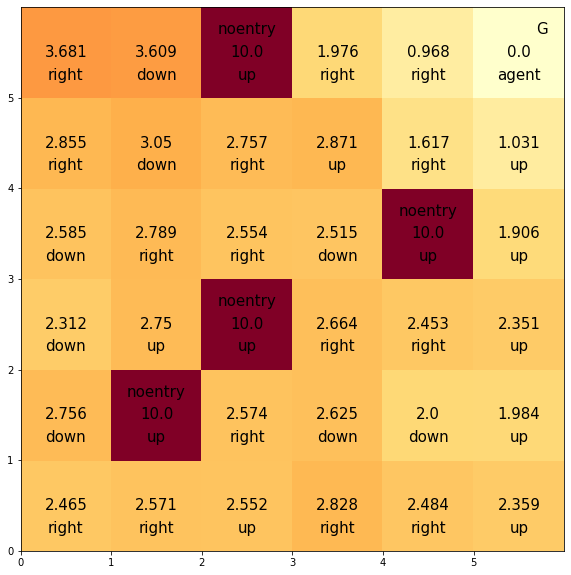

s:(1, 2)　a:left s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':left
----
s:(1, 2)　a:left s':(0, 2) a':left
----
s:(0, 2)　a:left s':(0, 2) a':left
----
s:(0, 2)　a:left s':(0, 2) a':left
----
s:(0, 2)　a:left s':(0, 2) a':down
----
s:(0, 2)　a:down s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':up
----
s:(0, 2)　a:up s':(0, 3) a':up
----
s:(0, 3)　a:up s':(0, 4) a':up
----
s:(0, 4)　a:up s':(0, 5) a':up
----
s:(0, 5)　a:up s':(0, 5) a':up
----
s:(0, 5)　a:up s':(0, 5) a':down
----
s:(0, 5)　a:down s':(0, 4) a':down
----
s:(0, 4)　a:down s':(0, 3) a':right
----
s:(0, 3)　a:right s':(1, 3) a':left
----
s:(1, 3)　a:left s':(0, 3) a':down
----
s:(0, 3)　a:down s':(0, 2) a':right
----
s:(0, 2)　a:right s':(1, 2) a':up
----
s:(1, 2)　a:up s':(1, 3) a':up
----
s:(1, 3)　a:up s':(1, 4) a':right
----
s:(1, 4)　a:right s':(2, 4) a':right
----
s:(2, 4)　a:right s':(2, 4) a':right
----
s:(2, 4)　a:right s':(3, 4) a':down
----
s:(3, 4)　a:down s':(3, 3) a':up
----
s:(3, 3)　a:up s':(3, 4) a':right
----
s:(3, 4)　

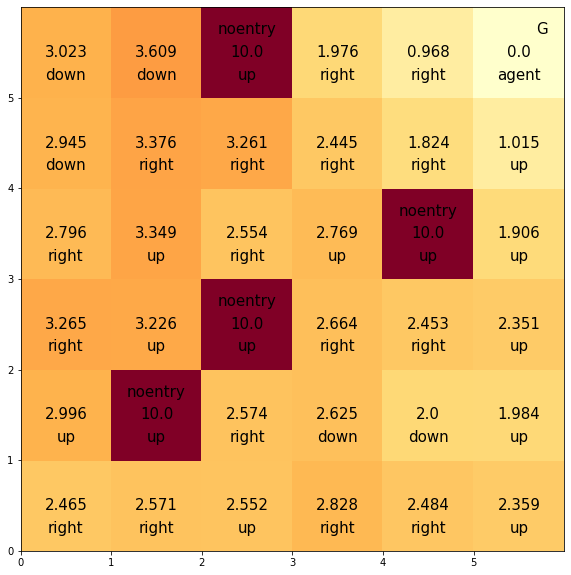

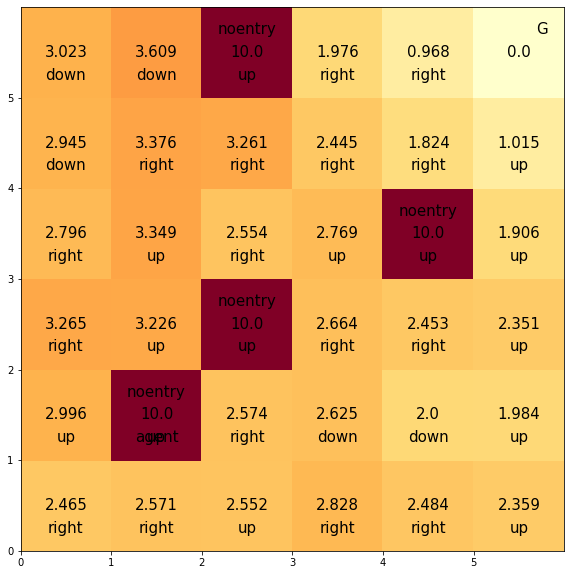

s:(3, 1)　a:left s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':right
----
s:(2, 0)　a:right s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':right
----
s:(2, 1)　a:right s':(3, 1) a':right
----
s:(3, 1)　a:right s':(4, 1) a':right
----
s:(4, 1)　a:right s':(5, 1) a':left
----
s:(5, 1)　a:left s':(5, 1) a':left
----
s:(5, 1)　a:left s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':right
----
s:(3, 1)　a:right s':(4, 1) a':up
----
s:(4, 1)　a:up s':(4, 2) a':right
----
s:(4, 2)　a:right s':(4, 2) a':right
----
s:(4, 2)　a:right s':(5, 2) a':left
----
s:(5, 2)　a:left s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':down
----
s:(3, 2)　a:down s':(3, 

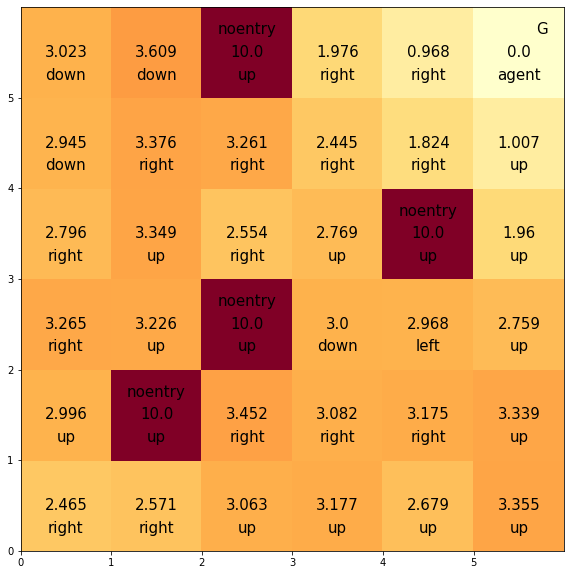

s:(2, 3)　a:right s':(3, 3) a':down
----
s:(3, 3)　a:down s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 3) a':left
----
s:(3, 3)　a:left s':(2, 3) a':up
----
s:(2, 3)　a:up s':(2, 4) a':down
----
s:(2, 4)　a:down s':(2, 3) a':left
----
s:(2, 3)　a:left s':(2, 3) a':left
----
s:(2, 3)　a:left s':(1, 3) a':right
----
s:(1, 3)　a:right s':(1, 3) a':down
----
s:(1, 3)　a:down s':(1, 2) a':left
----
s:(1, 2)　a:left s':(0, 2) a':down
----
s:(0, 2)　a:down s':(0, 1) a':down
----
s:(0, 1)　a:down s':(0, 0) a':down
----
s:(0, 0)　a:down s':(0, 0) a':down
----
s:(0, 0)　a:down s':(0, 0) a':right
----
s:(0, 0)　a:right s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':right
----
s:(2, 0)　a:right s':(3, 0) a':right
----
s:(3, 0)　a:right s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':left
----
s:(4, 0)　a:left s'

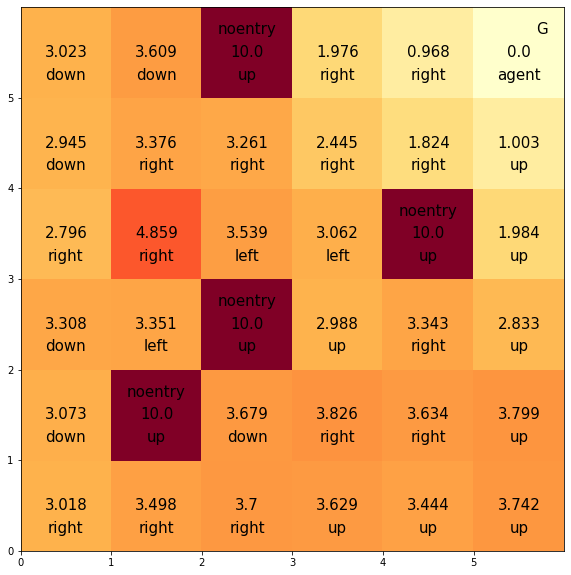

s:(0, 4)　a:right s':(1, 4) a':down
----
s:(1, 4)　a:down s':(1, 4) a':right
----
s:(1, 4)　a:right s':(2, 4) a':right
----
s:(2, 4)　a:right s':(3, 4) a':right
----
s:(3, 4)　a:right s':(4, 4) a':up
----
s:(4, 4)　a:up s':(4, 5) a':right
----
s:(4, 5)　a:right s':(5, 5) a':up
----


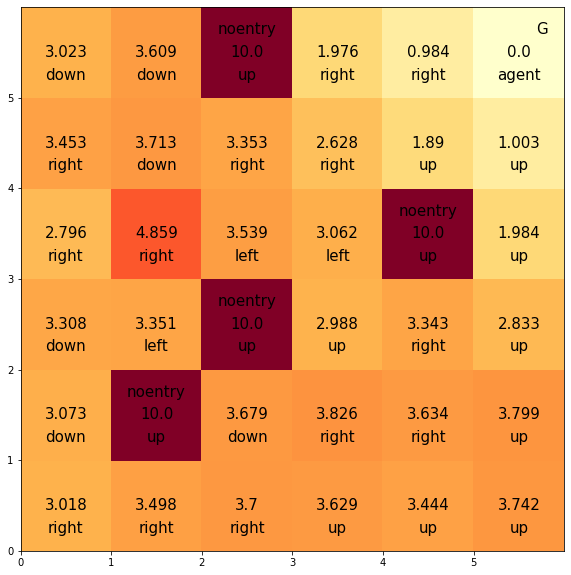

s:(1, 3)　a:left s':(0, 3) a':left
----
s:(0, 3)　a:left s':(0, 3) a':left
----
s:(0, 3)　a:left s':(0, 3) a':right
----
s:(0, 3)　a:right s':(0, 3) a':right
----
s:(0, 3)　a:right s':(1, 3) a':left
----
s:(1, 3)　a:left s':(0, 3) a':up
----
s:(0, 3)　a:up s':(0, 4) a':up
----
s:(0, 4)　a:up s':(0, 5) a':left
----
s:(0, 5)　a:left s':(0, 5) a':left
----
s:(0, 5)　a:left s':(0, 5) a':down
----
s:(0, 5)　a:down s':(0, 4) a':down
----
s:(0, 4)　a:down s':(0, 3) a':down
----
s:(0, 3)　a:down s':(0, 2) a':up
----
s:(0, 2)　a:up s':(0, 2) a':up
----
s:(0, 2)　a:up s':(0, 3) a':left
----
s:(0, 3)　a:left s':(0, 3) a':left
----
s:(0, 3)　a:left s':(0, 3) a':up
----
s:(0, 3)　a:up s':(0, 4) a':left
----
s:(0, 4)　a:left s':(0, 4) a':left
----
s:(0, 4)　a:left s':(0, 4) a':up
----
s:(0, 4)　a:up s':(0, 5) a':up
----
s:(0, 5)　a:up s':(0, 5) a':up
----
s:(0, 5)　a:up s':(0, 5) a':down
----
s:(0, 5)　a:down s':(0, 4) a':right
----
s:(0, 4)　a:right s':(1, 4) a':left
----
s:(1, 4)　a:left s':(0, 4) a':down
----
s:(0, 4)　a:d

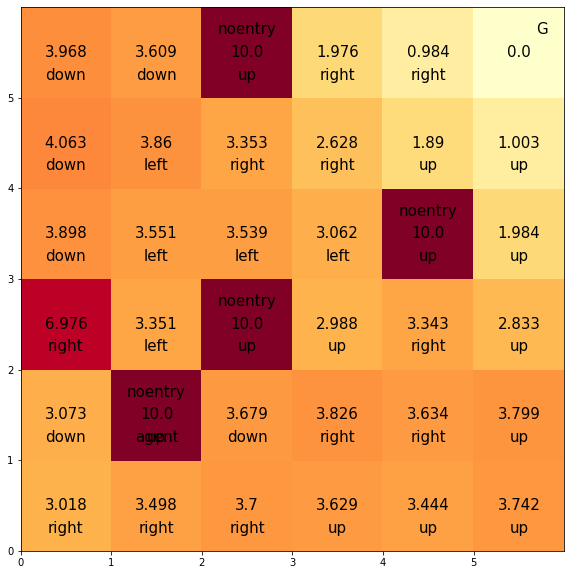

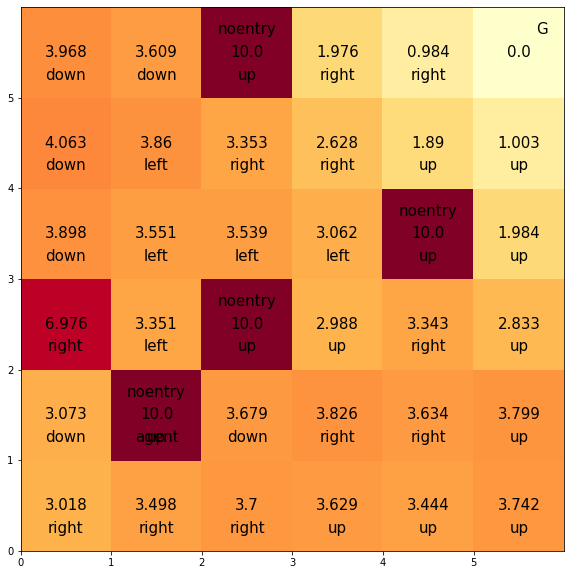

s:(1, 2)　a:up s':(1, 3) a':up
----
s:(1, 3)　a:up s':(1, 4) a':up
----
s:(1, 4)　a:up s':(1, 5) a':down
----
s:(1, 5)　a:down s':(1, 4) a':right
----
s:(1, 4)　a:right s':(2, 4) a':left
----
s:(2, 4)　a:left s':(1, 4) a':down
----
s:(1, 4)　a:down s':(1, 3) a':left
----
s:(1, 3)　a:left s':(0, 3) a':up
----
s:(0, 3)　a:up s':(0, 3) a':up
----
s:(0, 3)　a:up s':(0, 4) a':up
----
s:(0, 4)　a:up s':(0, 5) a':left
----
s:(0, 5)　a:left s':(0, 5) a':right
----
s:(0, 5)　a:right s':(1, 5) a':left
----
s:(1, 5)　a:left s':(0, 5) a':down
----
s:(0, 5)　a:down s':(0, 4) a':right
----
s:(0, 4)　a:right s':(1, 4) a':right
----
s:(1, 4)　a:right s':(2, 4) a':down
----
s:(2, 4)　a:down s':(2, 3) a':right
----
s:(2, 3)　a:right s':(3, 3) a':up
----
s:(3, 3)　a:up s':(3, 4) a':right
----
s:(3, 4)　a:right s':(4, 4) a':right
----
s:(4, 4)　a:right s':(5, 4) a':right
----
s:(5, 4)　a:right s':(5, 4) a':up
----
s:(5, 4)　a:up s':(5, 4) a':up
----
s:(5, 4)　a:up s':(5, 5) a':up
----


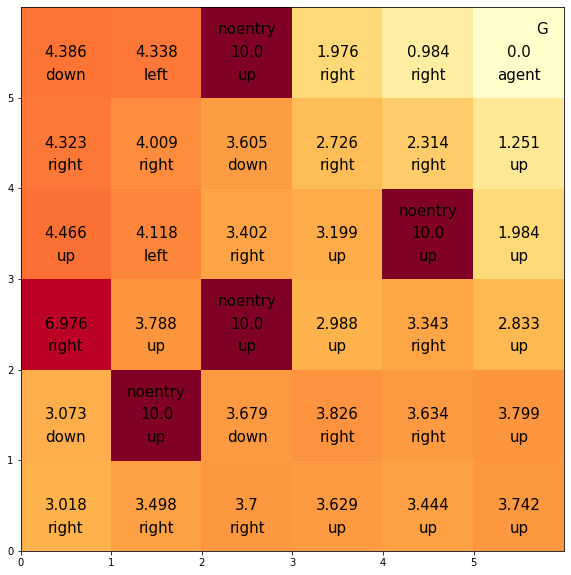

s:(0, 4)　a:left s':(0, 4) a':left
----
s:(0, 4)　a:left s':(0, 4) a':down
----
s:(0, 4)　a:down s':(0, 3) a':right
----
s:(0, 3)　a:right s':(1, 3) a':up
----
s:(1, 3)　a:up s':(1, 3) a':up
----
s:(1, 3)　a:up s':(1, 4) a':left
----
s:(1, 4)　a:left s':(0, 4) a':up
----
s:(0, 4)　a:up s':(0, 5) a':up
----
s:(0, 5)　a:up s':(0, 5) a':up
----
s:(0, 5)　a:up s':(0, 5) a':left
----
s:(0, 5)　a:left s':(0, 5) a':left
----
s:(0, 5)　a:left s':(0, 5) a':right
----
s:(0, 5)　a:right s':(1, 5) a':up
----
s:(1, 5)　a:up s':(1, 5) a':up
----
s:(1, 5)　a:up s':(1, 5) a':down
----
s:(1, 5)　a:down s':(1, 4) a':right
----
s:(1, 4)　a:right s':(1, 4) a':right
----
s:(1, 4)　a:right s':(2, 4) a':right
----
s:(2, 4)　a:right s':(3, 4) a':right
----
s:(3, 4)　a:right s':(4, 4) a':up
----
s:(4, 4)　a:up s':(4, 5) a':right
----
s:(4, 5)　a:right s':(5, 5) a':up
----


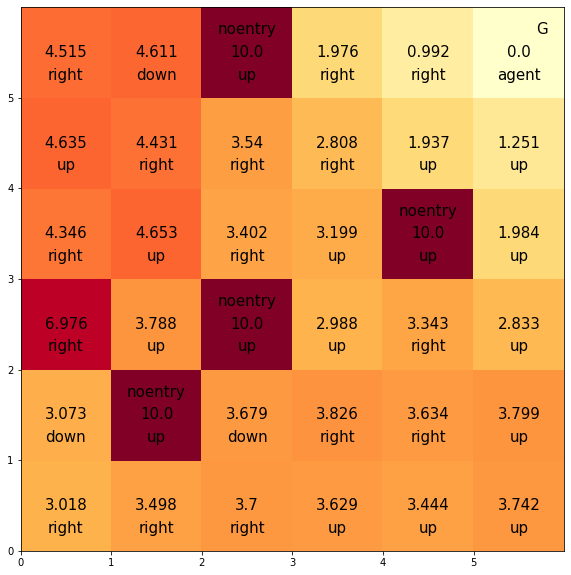

s:(3, 4)　a:down s':(3, 4) a':down
----
s:(3, 4)　a:down s':(3, 3) a':down
----
s:(3, 3)　a:down s':(3, 2) a':right
----
s:(3, 2)　a:right s':(3, 2) a':right
----
s:(3, 2)　a:right s':(4, 2) a':left
----
s:(4, 2)　a:left s':(3, 2) a':up
----
s:(3, 2)　a:up s':(3, 3) a':left
----
s:(3, 3)　a:left s':(2, 3) a':up
----
s:(2, 3)　a:up s':(2, 4) a':right
----
s:(2, 4)　a:right s':(3, 4) a':right
----
s:(3, 4)　a:right s':(4, 4) a':up
----
s:(4, 4)　a:up s':(4, 4) a':down
----
s:(4, 4)　a:down s':(4, 3) a':up
----


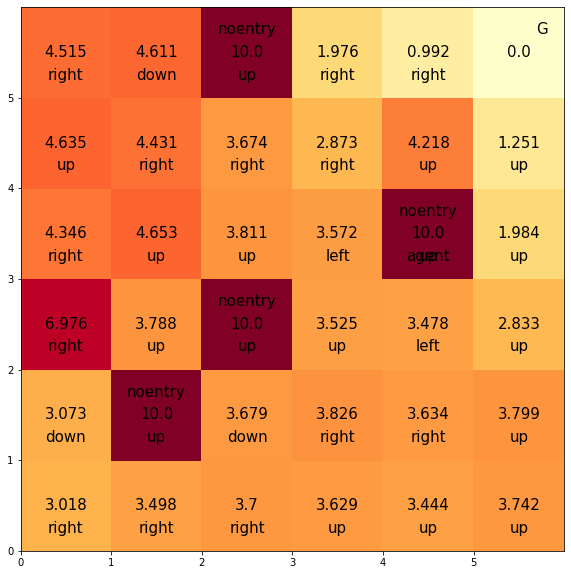

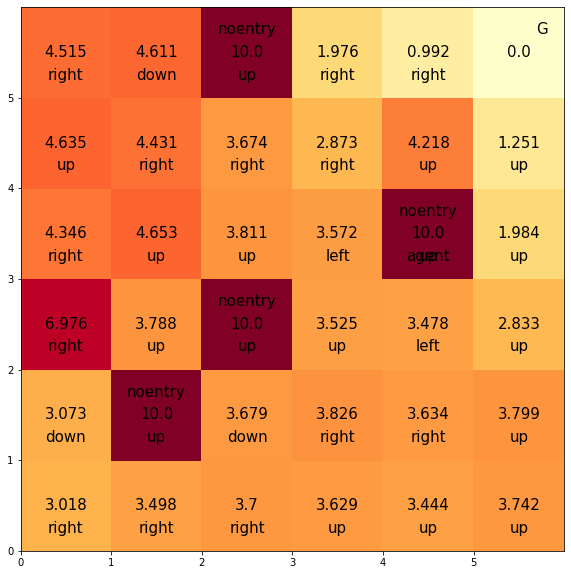

s:(5, 1)　a:down s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':left
----
s:(4, 0)　a:left s':(4, 0) a':left
----
s:(4, 0)　a:left s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':right
----
s:(2, 1)　a:right s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':right
----
s:(3, 1)　a:right s':(4, 1) a':down
----
s:(4, 1)　a:down s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':right
----
s:(5, 0)　a:right s':(5, 0) a':right
----
s:(5, 0)　a:right s':(5, 0) a':right
----
s:(5, 0)　a:right s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':left
----
s:(3, 1)　a:left s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':left
----
s:(1, 0)　a:left s':(0, 0) a':down
----
s:(0, 0)　a:down s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':

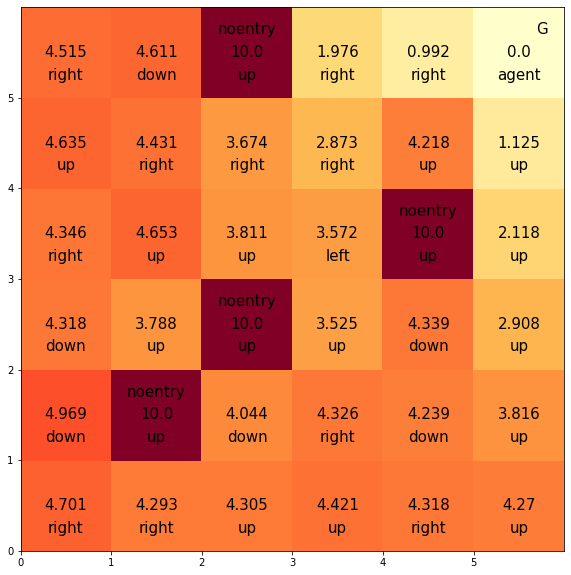

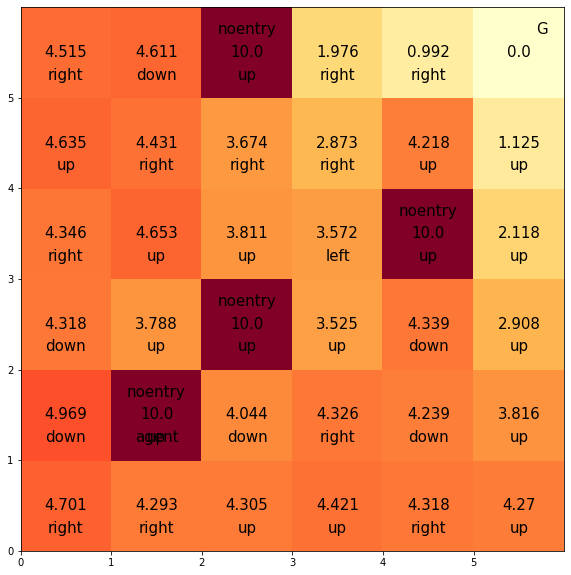

s:(1, 4)　a:up s':(1, 4) a':up
----
s:(1, 4)　a:up s':(1, 5) a':left
----
s:(1, 5)　a:left s':(0, 5) a':down
----
s:(0, 5)　a:down s':(0, 4) a':right
----
s:(0, 4)　a:right s':(1, 4) a':down
----
s:(1, 4)　a:down s':(1, 3) a':left
----
s:(1, 3)　a:left s':(0, 3) a':down
----
s:(0, 3)　a:down s':(0, 2) a':up
----
s:(0, 2)　a:up s':(0, 3) a':left
----
s:(0, 3)　a:left s':(0, 3) a':left
----
s:(0, 3)　a:left s':(0, 3) a':right
----
s:(0, 3)　a:right s':(1, 3) a':left
----
s:(1, 3)　a:left s':(0, 3) a':down
----
s:(0, 3)　a:down s':(0, 2) a':left
----
s:(0, 2)　a:left s':(0, 2) a':left
----
s:(0, 2)　a:left s':(0, 2) a':down
----
s:(0, 2)　a:down s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':up
----
s:(0, 2)　a:up s':(0, 3) a':up
----
s:(0, 3)　a:up s':(0, 4) a':down
----
s:(0, 4)　a:down s':(0, 3) a':down
----
s:(0, 3)　a:down s':(0, 2) a':down
----
s:(0, 2)　a:down s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':left
----
s:(0, 2)

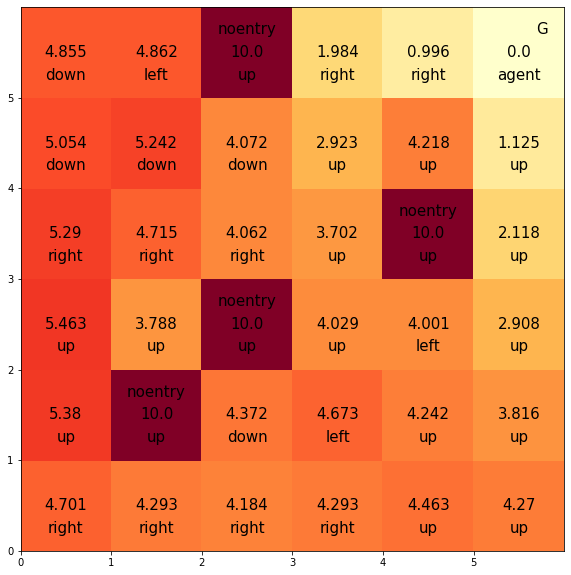

s:(1, 5)　a:down s':(1, 4) a':right
----
s:(1, 4)　a:right s':(1, 4) a':right
----
s:(1, 4)　a:right s':(2, 4) a':right
----
s:(2, 4)　a:right s':(3, 4) a':right
----
s:(3, 4)　a:right s':(4, 4) a':left
----
s:(4, 4)　a:left s':(3, 4) a':up
----
s:(3, 4)　a:up s':(3, 5) a':right
----
s:(3, 5)　a:right s':(4, 5) a':down
----
s:(4, 5)　a:down s':(4, 4) a':right
----
s:(4, 4)　a:right s':(5, 4) a':up
----
s:(5, 4)　a:up s':(5, 5) a':up
----


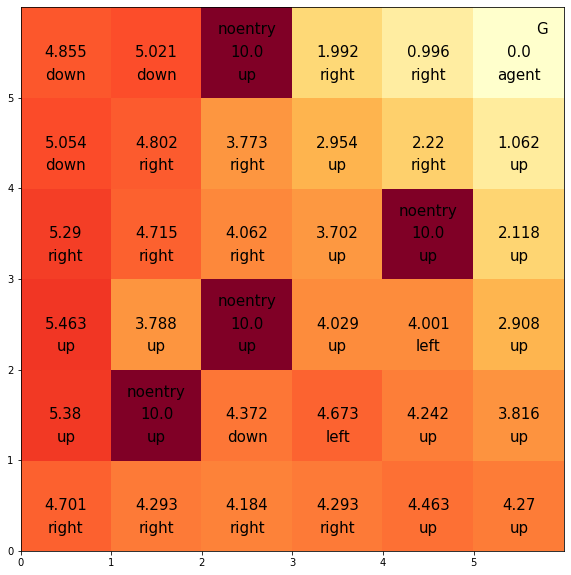

s:(3, 4)　a:up s':(3, 5) a':down
----
s:(3, 5)　a:down s':(3, 4) a':right
----
s:(3, 4)　a:right s':(4, 4) a':right
----
s:(4, 4)　a:right s':(4, 4) a':right
----
s:(4, 4)　a:right s':(5, 4) a':up
----
s:(5, 4)　a:up s':(5, 5) a':up
----


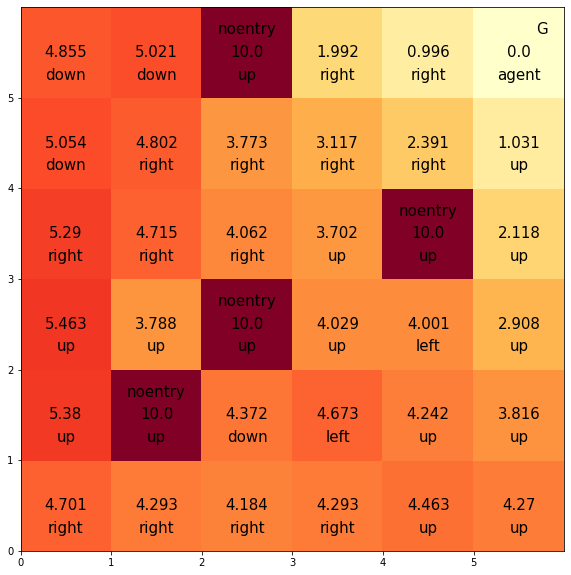

s:(2, 4)　a:right s':(3, 4) a':right
----
s:(3, 4)　a:right s':(3, 4) a':right
----
s:(3, 4)　a:right s':(4, 4) a':right
----
s:(4, 4)　a:right s':(5, 4) a':down
----
s:(5, 4)　a:down s':(5, 3) a':up
----
s:(5, 3)　a:up s':(5, 4) a':left
----
s:(5, 4)　a:left s':(4, 4) a':right
----
s:(4, 4)　a:right s':(5, 4) a':up
----
s:(5, 4)　a:up s':(5, 5) a':up
----


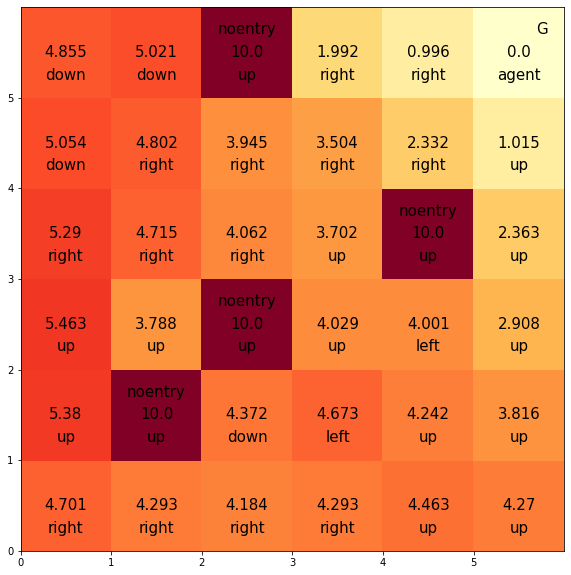

s:(5, 4)　a:up s':(5, 5) a':up
----


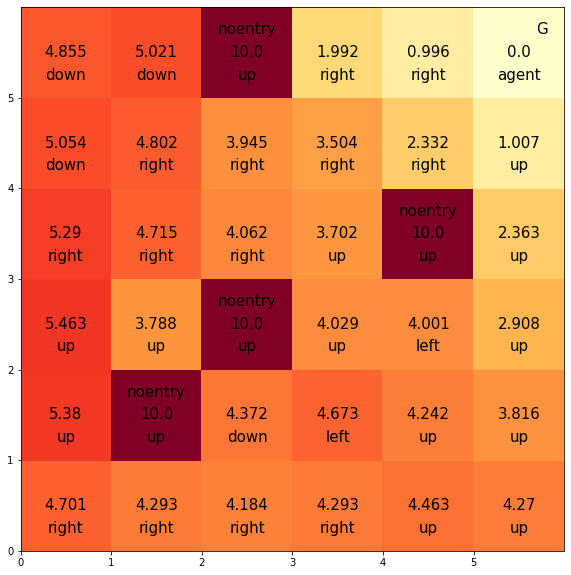

s:(4, 0)　a:left s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':left
----
s:(1, 0)　a:left s':(0, 0) a':left
----
s:(0, 0)　a:left s':(0, 0) a':left
----
s:(0, 0)　a:left s':(0, 0) a':right
----
s:(0, 0)　a:right s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':right
----
s:(2, 0)　a:right s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':right
----
s:(3, 0)　a:right s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':down
----
s:(5, 0)　a:down s':(5, 0) a':left
----
s:(5, 0)　a:left s':(4, 0) a':up
----
s:(4, 0)　a:up s':(4, 1) a':left
----
s:(4, 1)　a:left s':(3, 1) a':right
----
s:(3, 1)　a:right s':(4, 1) a':right
----
s:(4, 1)　a:right s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 

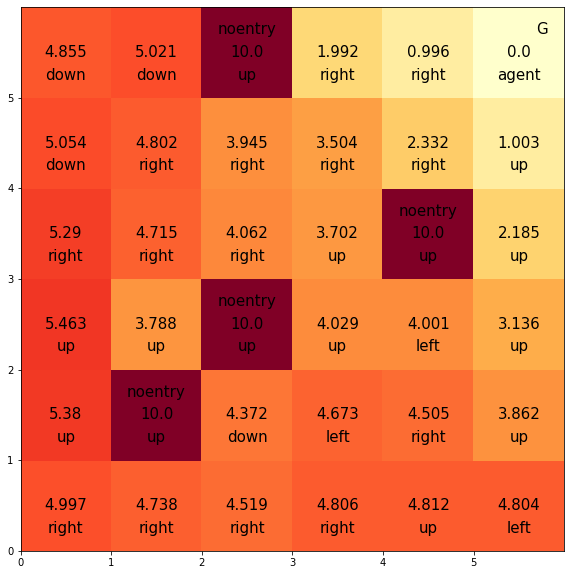

s:(4, 0)　a:left s':(3, 0) a':left
----
s:(3, 0)　a:left s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':right
----
s:(1, 0)　a:right s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':down
----
s:(2, 1)　a:down s':(2, 0) a':right
----
s:(2, 0)　a:right s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':down
----
s:(3, 1)　a:down s':(3, 0) a':right
----
s:(3, 0)　a:right s':(4, 0) a':down
----
s:(4, 0)　a:down s':(4, 0) a':right
----
s:(4, 0)　a:right s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':right
----
s:(5, 2)　a:right s':(5, 2) a':right
----
s:(5, 2)　a:right s':(5, 2) a':down
----
s:(5, 2)　a:down s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 3) a':up
----
s:(5, 3)　a:up s':(5, 4) a':up
----
s:(5, 4)　a:up s':(5, 5) a':up
----


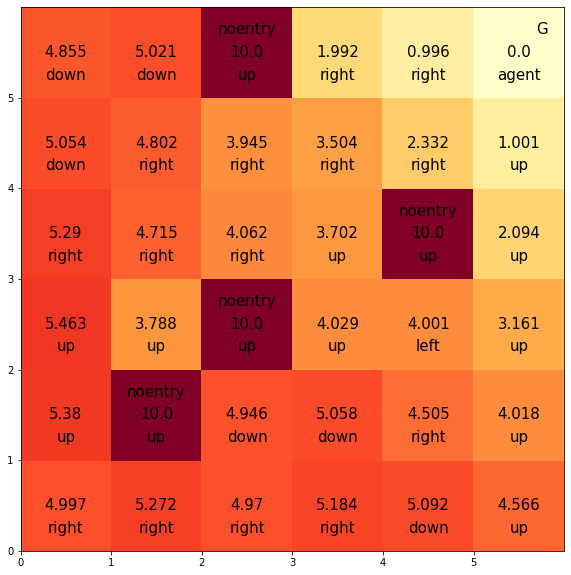

s:(1, 4)　a:left s':(0, 4) a':up
----
s:(0, 4)　a:up s':(0, 5) a':right
----
s:(0, 5)　a:right s':(1, 5) a':up
----
s:(1, 5)　a:up s':(1, 5) a':up
----
s:(1, 5)　a:up s':(1, 5) a':left
----
s:(1, 5)　a:left s':(1, 5) a':left
----
s:(1, 5)　a:left s':(0, 5) a':down
----
s:(0, 5)　a:down s':(0, 4) a':right
----
s:(0, 4)　a:right s':(1, 4) a':right
----
s:(1, 4)　a:right s':(2, 4) a':left
----
s:(2, 4)　a:left s':(1, 4) a':down
----
s:(1, 4)　a:down s':(1, 3) a':right
----
s:(1, 3)　a:right s':(2, 3) a':up
----
s:(2, 3)　a:up s':(2, 4) a':right
----
s:(2, 4)　a:right s':(3, 4) a':up
----
s:(3, 4)　a:up s':(3, 5) a':right
----
s:(3, 5)　a:right s':(4, 5) a':right
----
s:(4, 5)　a:right s':(4, 5) a':right
----
s:(4, 5)　a:right s':(5, 5) a':up
----


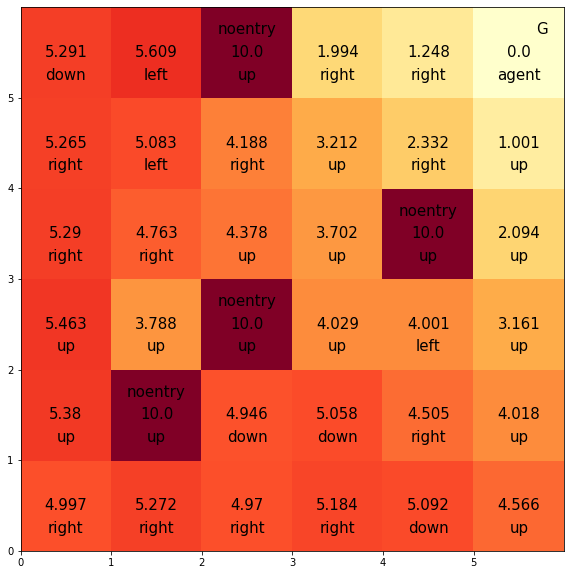

s:(5, 0)　a:up s':(5, 0) a':up
----
s:(5, 0)　a:up s':(5, 1) a':up
----
s:(5, 1)　a:up s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 3) a':up
----
s:(5, 3)　a:up s':(5, 4) a':up
----
s:(5, 4)　a:up s':(5, 5) a':up
----


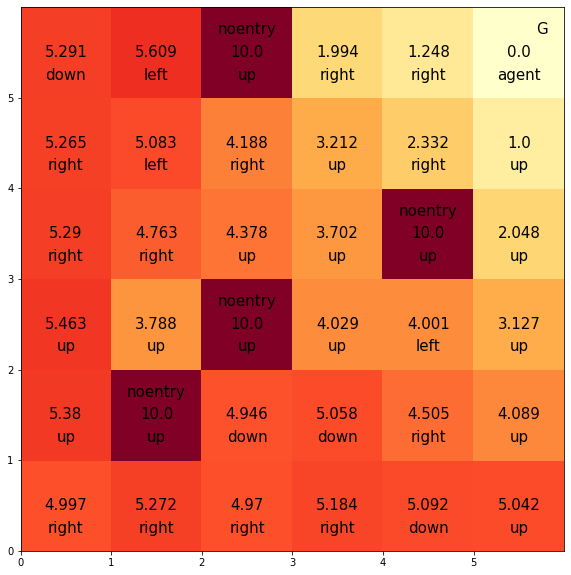

s:(0, 3)　a:up s':(0, 4) a':left
----
s:(0, 4)　a:left s':(0, 4) a':left
----
s:(0, 4)　a:left s':(0, 4) a':down
----
s:(0, 4)　a:down s':(0, 3) a':left
----
s:(0, 3)　a:left s':(0, 3) a':left
----
s:(0, 3)　a:left s':(0, 3) a':down
----
s:(0, 3)　a:down s':(0, 2) a':down
----
s:(0, 2)　a:down s':(0, 1) a':down
----
s:(0, 1)　a:down s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':left
----
s:(0, 1)　a:left s':(0, 1) a':down
----
s:(0, 1)　a:down s':(0, 0) a':down
----
s:(0, 0)　a:down s':(0, 0) a':down
----
s:(0, 0)　a:down s':(0, 0) a':right
----
s:(0, 0)　a:right s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':down
----
s:(1, 0)　a:down s':(1, 0) a':left
----
s:(1, 0)　a:left s':(0, 0) a':left
----
s:(0, 0)　a:left s':(0, 0) a':left
----
s:(0, 0)　a:left s':(0, 0) a':right
----
s:(0, 0)　a:right s':(1, 0) a':right
----
s:(1, 0)　a:right s':(2, 0) a':up
----
s:(2, 0)　a:up s':(2, 1) a':left
----
s:(2, 1)　a:left s':(1, 1) a':up
----


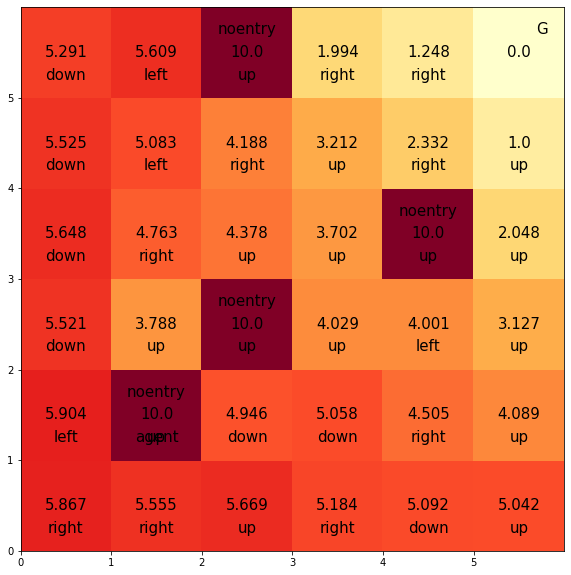

s:(1, 3)　a:right s':(2, 3) a':right
----
s:(2, 3)　a:right s':(3, 3) a':left
----
s:(3, 3)　a:left s':(2, 3) a':right
----
s:(2, 3)　a:right s':(3, 3) a':down
----
s:(3, 3)　a:down s':(3, 2) a':right
----
s:(3, 2)　a:right s':(4, 2) a':right
----
s:(4, 2)　a:right s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 3) a':up
----
s:(5, 3)　a:up s':(5, 4) a':up
----
s:(5, 4)　a:up s':(5, 5) a':up
----


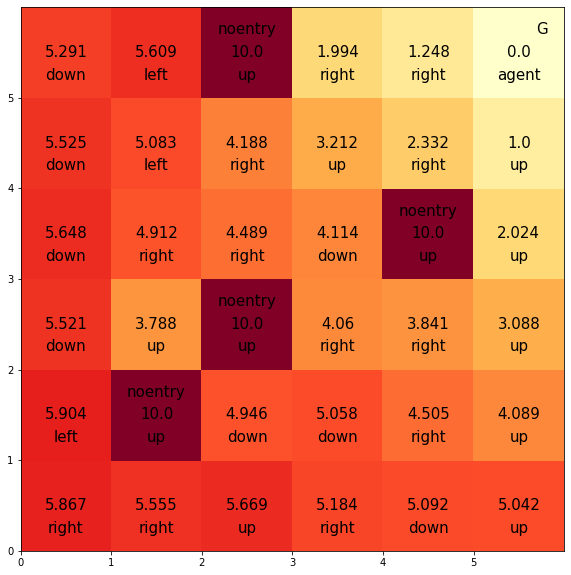

s:(4, 2)　a:right s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 3) a':up
----
s:(5, 3)　a:up s':(5, 4) a':up
----
s:(5, 4)　a:up s':(5, 5) a':up
----


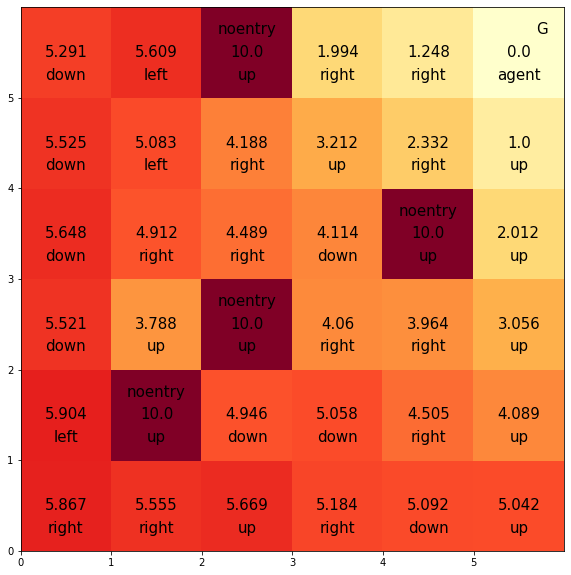

s:(3, 2)　a:up s':(3, 3) a':up
----
s:(3, 3)　a:up s':(3, 4) a':up
----
s:(3, 4)　a:up s':(3, 5) a':right
----
s:(3, 5)　a:right s':(4, 5) a':right
----
s:(4, 5)　a:right s':(5, 5) a':up
----


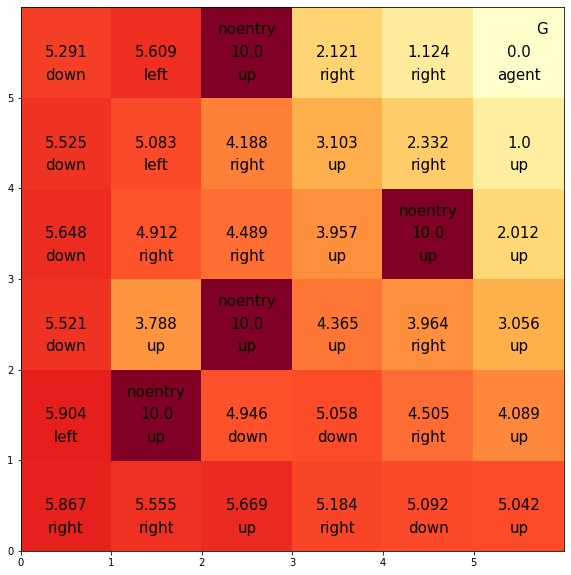

s:(2, 0)　a:down s':(2, 0) a':down
----
s:(2, 0)　a:down s':(2, 0) a':right
----
s:(2, 0)　a:right s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':down
----
s:(3, 0)　a:down s':(3, 0) a':up
----
s:(3, 0)　a:up s':(3, 1) a':up
----
s:(3, 1)　a:up s':(3, 2) a':right
----
s:(3, 2)　a:right s':(4, 2) a':down
----
s:(4, 2)　a:down s':(4, 1) a':up
----
s:(4, 1)　a:up s':(4, 2) a':right
----
s:(4, 2)　a:right s':(5, 2) a':up
----
s:(5, 2)　a:up s':(5, 3) a':up
----
s:(5, 3)　a:up s':(5, 4) a':up
----
s:(5, 4)　a:up s':(5, 5) a':up
----


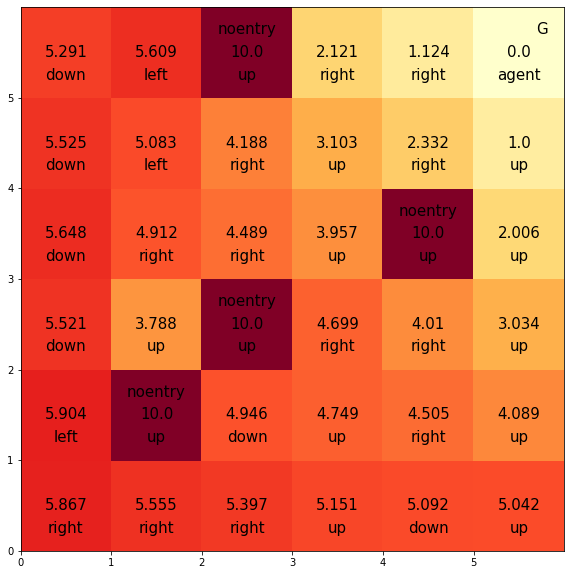

s:(1, 5)　a:down s':(1, 4) a':right
----
s:(1, 4)　a:right s':(2, 4) a':down
----
s:(2, 4)　a:down s':(2, 3) a':up
----
s:(2, 3)　a:up s':(2, 4) a':right
----
s:(2, 4)　a:right s':(3, 4) a':up
----
s:(3, 4)　a:up s':(3, 5) a':right
----
s:(3, 5)　a:right s':(4, 5) a':right
----
s:(4, 5)　a:right s':(5, 5) a':up
----


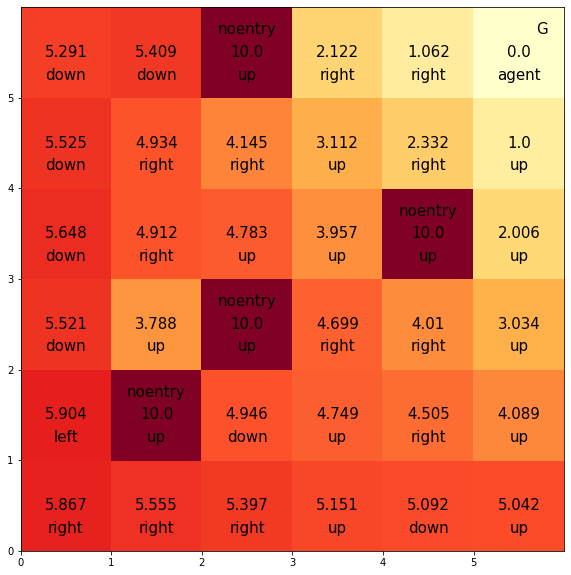

s:(1, 0)　a:up s':(1, 0) a':up
----
s:(1, 0)　a:up s':(1, 1) a':up
----


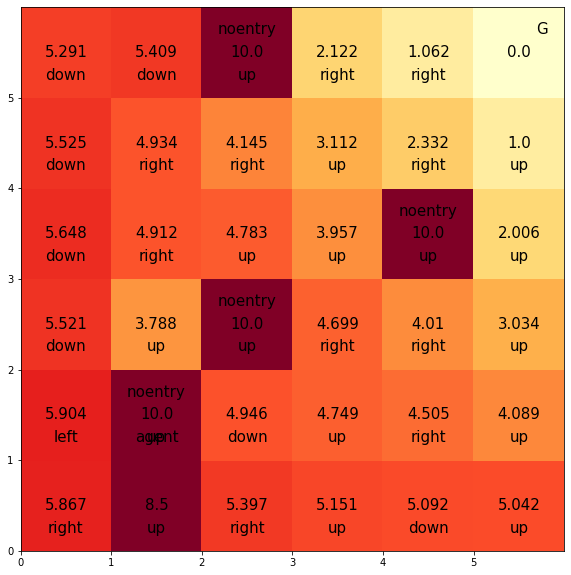

s:(1, 0)　a:right s':(2, 0) a':left
----
s:(2, 0)　a:left s':(1, 0) a':left
----
s:(1, 0)　a:left s':(0, 0) a':up
----
s:(0, 0)　a:up s':(0, 1) a':up
----
s:(0, 1)　a:up s':(0, 2) a':up
----
s:(0, 2)　a:up s':(0, 3) a':right
----
s:(0, 3)　a:right s':(1, 3) a':down
----
s:(1, 3)　a:down s':(1, 2) a':left
----
s:(1, 2)　a:left s':(0, 2) a':down
----
s:(0, 2)　a:down s':(0, 1) a':right
----
s:(0, 1)　a:right s':(1, 1) a':up
----


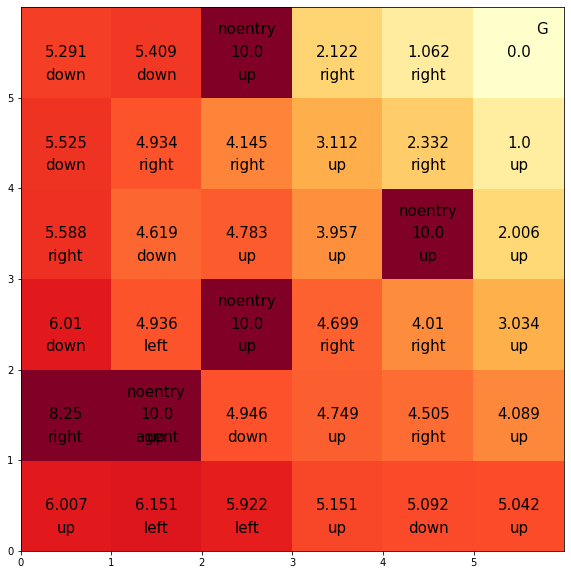

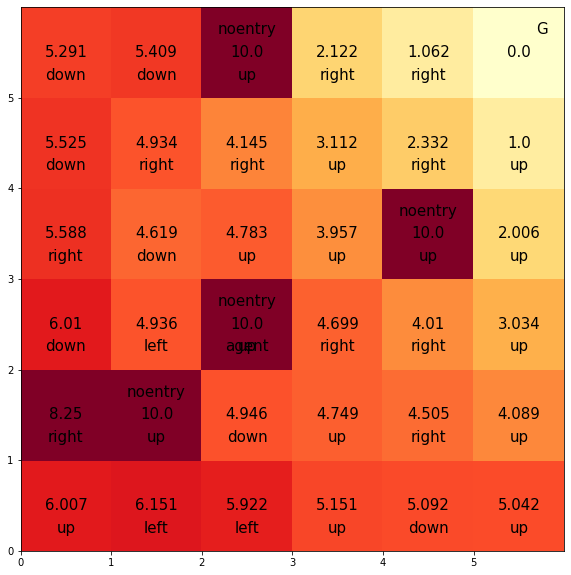

In [ ]:
alpha = 0.5
gamma = 1.0

def sarsa(s_pos,a):
    s = states[s_pos[0]][s_pos[1]]
    s_next_pos = state_transition(s_pos,a)
    s_next = states[s_next_pos[0]][s_next_pos[1]]
    a_next = e_greedy(s_next)
    
    q = (1.0-alpha)*s.Q[a] + alpha * (1.0 + gamma * s_next.Q[a_next])
    print("s:" + str(s_pos)+ "　a:" + a + " s':" + str(s_next_pos) + " a':" + a_next)
    print("----")
    return s_next_pos, a_next, q

def one_trial():
    agent.pos = (random.randrange(size),random.randrange(size))
    a = e_greedy(states[agent.pos[0]][agent.pos[1]])
    #aは行動
    if states[agent.pos[0]][agent.pos[1]].goal:
        return
    if states[agent.pos[0]][agent.pos[1]].noentry:
        return
    
    #elif states[agent.pos[0]][agent.pos[1]].entry:
      #  return
          
    while True:
        #draw(None)
        if states[agent.pos[0]][agent.pos[1]].noentry:
            return
        s_next, a_next, q = sarsa(agent.pos,a)
        states[agent.pos[0]][agent.pos[1]].Q[a] = q
        agent.pos = s_next
        a = a_next
        if states[agent.pos[0]][agent.pos[1]].goal:
            break
            
            
import copy
f_states = copy.deepcopy(states)
for i in range(100):
    one_trial()
    draw("all")